# Background and Objective
As the banking industry faces increasing competition and higher customer expectations, accurately predicting customer churn has become a critical factor for banks in their efforts to retain customers and enhance overall customer satisfaction. Understanding the underlying factors that contribute to customer churn can provide valuable insights that help banks develop targeted retention strategies, optimize the customer experience, and improve overall customer relationship management practices. By leveraging advanced analytics and data-driven approaches, banks can gain a deeper understanding of customer behavior and preferences, enabling them to address customer churn more effectively.

### The primary objective of this project is to develop a robust churn prediction model that can accurately identify potential churners among bank customers
 Through the analysis of various customer-related data such as transaction history, demographics, account activity, and customer interactions, the model aims to predict which customers are most likely to churn in the near future. By utilizing sophisticated machine learning algorithms and predictive analytics techniques, the model can identify patterns and indicators that are indicative of potential churn, allowing banks to take proactive measures to retain these customers and minimize customer attrition. Ultimately, the development of an accurate churn prediction model can significantly contribute to the reduction of customer churn rates and improve overall customer retention for banks.



#  Here's an explanation of each column in the dataset:

##### 1.CLIENTNUM: This is a unique identifier for each customer.

#### 2. Attrition_Flag: This indicates whether the customer has churned (left the service) or not. It is a categorical variable with values like "Attrited Customer" and "Existing Customer".

#### 3.     Customer_Age: The age of the customer.(Age can influence churn as different age groups may have different needs and behaviors.)

#### 4.     Gender: The gender of the customer, typically categorized as "Male" or "Female".

#### 5.     Dependent_count: The number of dependents that the customer has.(The number of dependents can affect financial decisions and stability.)

#### 6.    Education_Level: The highest level of education attained by the customer, such as "High School", "College", "Graduate", etc.

#### 7.    Marital_Status: The marital status of the customer, such as "Single", "Married", "Divorced", etc.

#### 8.    Income_Category: The income category of the customer, often grouped into ranges like "$60K - $80K", "$80K - $120K", etc 
#### (Income level often correlates with financial behavior and risk of churn.).

#### 9.    Card_Category: The type of credit card held by the customer, such as "Blue", "Silver", "Gold", etc.( The type of credit card might indicate the customer's engagement level and loyalty.)

#### 10.    Months_on_book: The number of months the customer has been on the books (i.e., the duration of the customer's relationship with the company).(highly inactive means higher risk of churn)

#### 11.    Total_Relationship_Count: The total number of products the customer has with the company(The number of products the customer has with the bank can show their level of engagement and dependency on the bank.)


#### 12.    Months_Inactive_12_mon: The number of months the customer has been inactive in the past 12 months.(higher value higher risk of churn)

#### 13.    Contacts_Count_12_mon: The number of contacts (e.g., calls, emails) the customer has made with customer service in the past 12 months.(maximum value means more churn )

#### 14.    Credit_Limit: The credit limit of the customer's credit card.(A higher credit limit can indicate a more valuable customer, but if not utilized, it could also indicate a risk of churn.)

#### 15.    Total_Revolving_Bal: The total revolving balance on the customer's credit card.

#### 16.    Avg_Open_To_Buy: The average open-to-buy credit line (remaining credit limit) of the customer.(The available credit can provide insight into the customer’s financial behavior and risk.

#### 17.    Total_Amt_Chng_Q4_Q1: The change in the total transaction amount from the fourth quarter to the first quarter.

#### 18.    Total_Trans_Amt: The total transaction amount over the specified period.

#### 19.    Total_Trans_Ct: The total number of transactions over the specified period.( The total number of transactions also reflects the customer's engagement.)

#### 20.    Total_Ct_Chng_Q4_Q1: The change in the total transaction count from the fourth quarter to the first quarter.

#### 21.    Avg_Utilization_Ratio: The average utilization ratio of the credit card (i.e., the proportion of the credit limit that is used).

#### 22.    Unnamed: 21: This appears to be an extra column that may have been created inadvertently during data collection or export. It might contain no useful information or could be an artifact of the data processing pipeline.

In [399]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline




In [400]:
file_path='BankChurners.csv'
df=pd.read_csv(file_path)

In [401]:
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Contacts_Count_12_mon  Credit_Limit  \
0              39  ...                      3       12691.0   
1              44  ...                      2        8256.0   
2              36  ...                      0        3418.0   
3              34  ...                      1        3313.0   
4              21  ...                      0        4716.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777          11914.0                 1.335   
1                  864           7392.0                 1.541   
2                    0           3418.0                 2.594   
3                 2517            796.0                 1.405   
4                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0             1144              42                1.625   
1             1291              33                3.714   
2             1887              20                2.333   
3             1171              20                2.333   
4              816              28                2.500   

   Avg_Utilization_Ratio  Unnamed: 21  
0                  0.061          NaN  
1                  0.105          NaN  
2                  0.000          NaN  
3                  0.760          NaN  
4                  0.000          NaN  

[5 rows x 22 columns]

In [402]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Unnamed: 21'],
      dtype='object')

In [403]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

#### Summary of raw data as imported:

We have over 10,000 rows, and 21 columns
Columns:
CLIENTNUM probably just an id number, not likely to be informative.
Attrition_Flag is the dependent variable we are trying to predict (churn/non-churn etc)
Several columns like Gender, Marital status are really categorical, rather than object type. Should look at label encoding the unique values.
There is an Unnamed column with 0 non-null values this can be safely dropped.
Lots of informative looking numerical features/columns to do with transaction stats. Might be able to gain some information by engineering new features as combinations of these

#  Data Preprocessing

  ### Lowercase col names

In [404]:
df.columns=df.columns.str.lower()

### Rename the target variable


In [405]:
df.rename(columns={'attrition_flag':'churn'},inplace=True)

In [406]:
#varyfying 
df.columns

Index(['clientnum', 'churn', 'customer_age', 'gender', 'dependent_count',
       'education_level', 'marital_status', 'income_category', 'card_category',
       'months_on_book', 'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
       'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt',
       'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio',
       'unnamed: 21'],
      dtype='object')

In [407]:
df['churn'].values

array(['Existing Customer', 'Existing Customer', 'Existing Customer', ...,
       'Attrited Customer', 'Attrited Customer', 'Attrited Customer'],
      dtype=object)

In [408]:
#convert churn values
df['churn'].replace(to_replace=['Existing Customer','Attrited Customer'],value=[0,1],inplace=True)
df['churn'].value_counts()
#we can also do this by importing labelencoder class

churn
0    8500
1    1627
Name: count, dtype: int64

In [409]:
#veryfying
df['churn'].unique()

array([0, 1], dtype=int64)

# Convert to categorical type
Convert to categorical type for efficiency and because ML models can't directly work with objects/strings, so these columns need to become encoded eventually anyway.

In [410]:
df=df.astype({'gender':'category','education_level':'category','marital_status':'category','income_category':'category','card_category':'category'})

In [411]:
#veryfying
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   clientnum                 10127 non-null  int64   
 1   churn                     10127 non-null  int64   
 2   customer_age              10127 non-null  int64   
 3   gender                    10127 non-null  category
 4   dependent_count           10127 non-null  int64   
 5   education_level           10127 non-null  category
 6   marital_status            10127 non-null  category
 7   income_category           10127 non-null  category
 8   card_category             10127 non-null  category
 9   months_on_book            10127 non-null  int64   
 10  total_relationship_count  10127 non-null  int64   
 11  months_inactive_12_mon    10127 non-null  int64   
 12  contacts_count_12_mon     10127 non-null  int64   
 13  credit_limit              10127 non-null  floa

In [412]:
#checking missing values
df.isnull().sum()

clientnum                       0
churn                           0
customer_age                    0
gender                          0
dependent_count                 0
education_level                 0
marital_status                  0
income_category                 0
card_category                   0
months_on_book                  0
total_relationship_count        0
months_inactive_12_mon          0
contacts_count_12_mon           0
credit_limit                    0
total_revolving_bal             0
avg_open_to_buy                 0
total_amt_chng_q4_q1            0
total_trans_amt                 0
total_trans_ct                  0
total_ct_chng_q4_q1             0
avg_utilization_ratio           0
unnamed: 21                 10127
dtype: int64

 Dropping Unnecessary Columns

In [413]:
df.drop(columns='unnamed: 21',inplace=True)
df.drop(columns='clientnum',inplace=True)

In [414]:
#merital status
df['marital_status'].value_counts()
#here 749 values are actually missing but filled with unknown 
#WE HAVE TO fill these values with most frequent value which is married here

marital_status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64

##### There are 749 "unknowns" out of 10,000 records. This is significant enough that we shouldn't just drop these records, we should try to fill these.

In [415]:
df['education_level'].value_counts()

education_level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64

In [416]:
df['income_category'].value_counts()

income_category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64

# This method has a few advantages:

###### 1.Preserves Data Distribution: It doesn't artificially increase the frequency of any existing category, which is important when dealing with imbalanced data.
###### 2.Keeps Information: By labeling missing values explicitly, you retain the information that data was missing, which could be relevant for model performance.
###### 3. Prevents Bias: It avoids introducing bias that could occur if a frequent category is disproportionately favored.

In [417]:
def fill_marital_status(df):
  '''Replace Unknown with Married.'''
  df.loc[:,'marital_status'] = df.marital_status.replace('Unknown','Missing')
  return df

df = fill_marital_status(df)
df.marital_status.value_counts()

marital_status
Married     4687
Single      3943
Missing      749
Divorced     748
Name: count, dtype: int64

In [418]:
def fill_income_category(df):
  '''Replace Unknown with Married.'''
  df.loc[:,'income_category'] = df.income_category.replace('Unknown','Missing')
  return df

df = fill_income_category(df)
df.income_category.value_counts()

income_category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Missing           1112
$120K +            727
Name: count, dtype: int64

In [419]:
def fill_education_level(df):
  '''Replace Unknown with Married.'''
  df.loc[:,'education_level'] = df.education_level.replace('Unknown','Missing')
  return df

df = fill_education_level(df)
df.education_level.value_counts()

education_level
Graduate         3128
High School      2013
Missing          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64

In [420]:
#checking if there is any duplicates exist or not
df.duplicated().sum()

0

In [421]:
df.nunique().to_frame(name='Count of Unique values')

Count of Unique values
churn                                          2
customer_age                                  45
gender                                         2
dependent_count                                6
education_level                                7
marital_status                                 4
income_category                                6
card_category                                  4
months_on_book                                44
total_relationship_count                       6
months_inactive_12_mon                         7
contacts_count_12_mon                          7
credit_limit                                6205
total_revolving_bal                         1974
avg_open_to_buy                             6813
total_amt_chng_q4_q1                        1158
total_trans_amt                             5033
total_trans_ct                               126
total_ct_chng_q4_q1                          830
avg_utilization_ratio                        964

In [422]:
df.apply(pd.unique).to_frame(name='Unique Values ')

Unique Values 
churn                                                                [0, 1]
customer_age              [45, 49, 51, 40, 44, 32, 37, 48, 42, 65, 56, 3...
gender                        ['M', 'F']
Categories (2, object): ['F', 'M']
dependent_count                                          [3, 5, 4, 2, 0, 1]
education_level           ['High School', 'Graduate', 'Uneducated', 'Mis...
marital_status            ['Married', 'Single', 'Missing', 'Divorced']
C...
income_category           ['$60K - $80K', 'Less than $40K', '$80K - $120...
card_category             ['Blue', 'Gold', 'Silver', 'Platinum']
Categor...
months_on_book            [39, 44, 36, 34, 21, 46, 27, 31, 54, 30, 48, 3...
total_relationship_count                                 [5, 6, 4, 3, 2, 1]
months_inactive_12_mon                                [1, 4, 2, 3, 6, 0, 5]
contacts_count_12_mon                                 [3, 2, 0, 1, 4, 5, 6]
credit_limit              [12691.0, 8256.0, 3418.0, 3313.0, 4716.0, 4010...
total_revolving_bal       [777, 864, 0, 2517, 1247, 2264, 1396, 1677, 14...
avg_open_to_buy           [11914.0, 7392.0, 3418.0, 796.0, 4716.0, 2763....
total_amt_chng_q4_q1      [1.335, 1.541, 2.594, 1.405, 2.175, 1.376, 1.9...
total_trans_amt           [1144, 1291, 1887, 1171, 816, 1088, 1330, 1538...
total_trans_ct            [42, 33, 20, 28, 24, 31, 36, 32, 26, 17, 29, 2...
total_ct_chng_q4_q1       [1.625, 3.714, 2.333, 2.5, 0.846, 0.722, 0.714...
avg_utilization_ratio     [0.061, 0.105, 0.0, 0.76, 0.311, 0.066, 0.048,...

# EDA

# Basis statistics

In [423]:
df.describe().style.background_gradient()

### Summary

1.Mean of Age is :46

2.Mean of Dependents is: 2

3.Mean of Months on book is :36

4.relationship count is 4

5.Months inactive in last year is 2

6.contacts in last year is 3

7.Credit limit is $8,632

8.Revolving balance is $1,162

9.Change in transaction amnt between Q4-Q1 is 0.8

10.Total transaction amnt is $4,404

11.Total transaction count is 65

12.Change in transaction count between Q4-Q1 is 0.7

13.Card utilisation ratio is 0.3

14.Churn is 0.2 (which means 20%, rounded) of the customer records are for churned customers.

In [424]:
df.describe(exclude=np.number,include='category')

gender education_level marital_status income_category card_category
count   10127           10127          10127           10127         10127
unique      2               7              4               6             4
top         F        Graduate        Married  Less than $40K          Blue
freq     5358            3128           4687            3561          9436

So this bank's customer base mostly comprises of:

1.Females (out of 2 categories, representing over 1/2 of customer-base)

2.Graduate level education (out of 7 categories, 1/3rd of the customer-base)

3.Seems like a large bias towards grads.

4.Married (out of 4 categories, just less than half of customer-base
Also seems strongly biased towards married people.
5.Incomes of less than $40k (out of 6 categories)

6.Again strong bias towards incomes less than $40k.

7.Blue card customers (out of 4 categories, almost 95% of customer base!)
Heavily biased towards blue card holders. Must be the standard option.

# Plotting Distribtion 


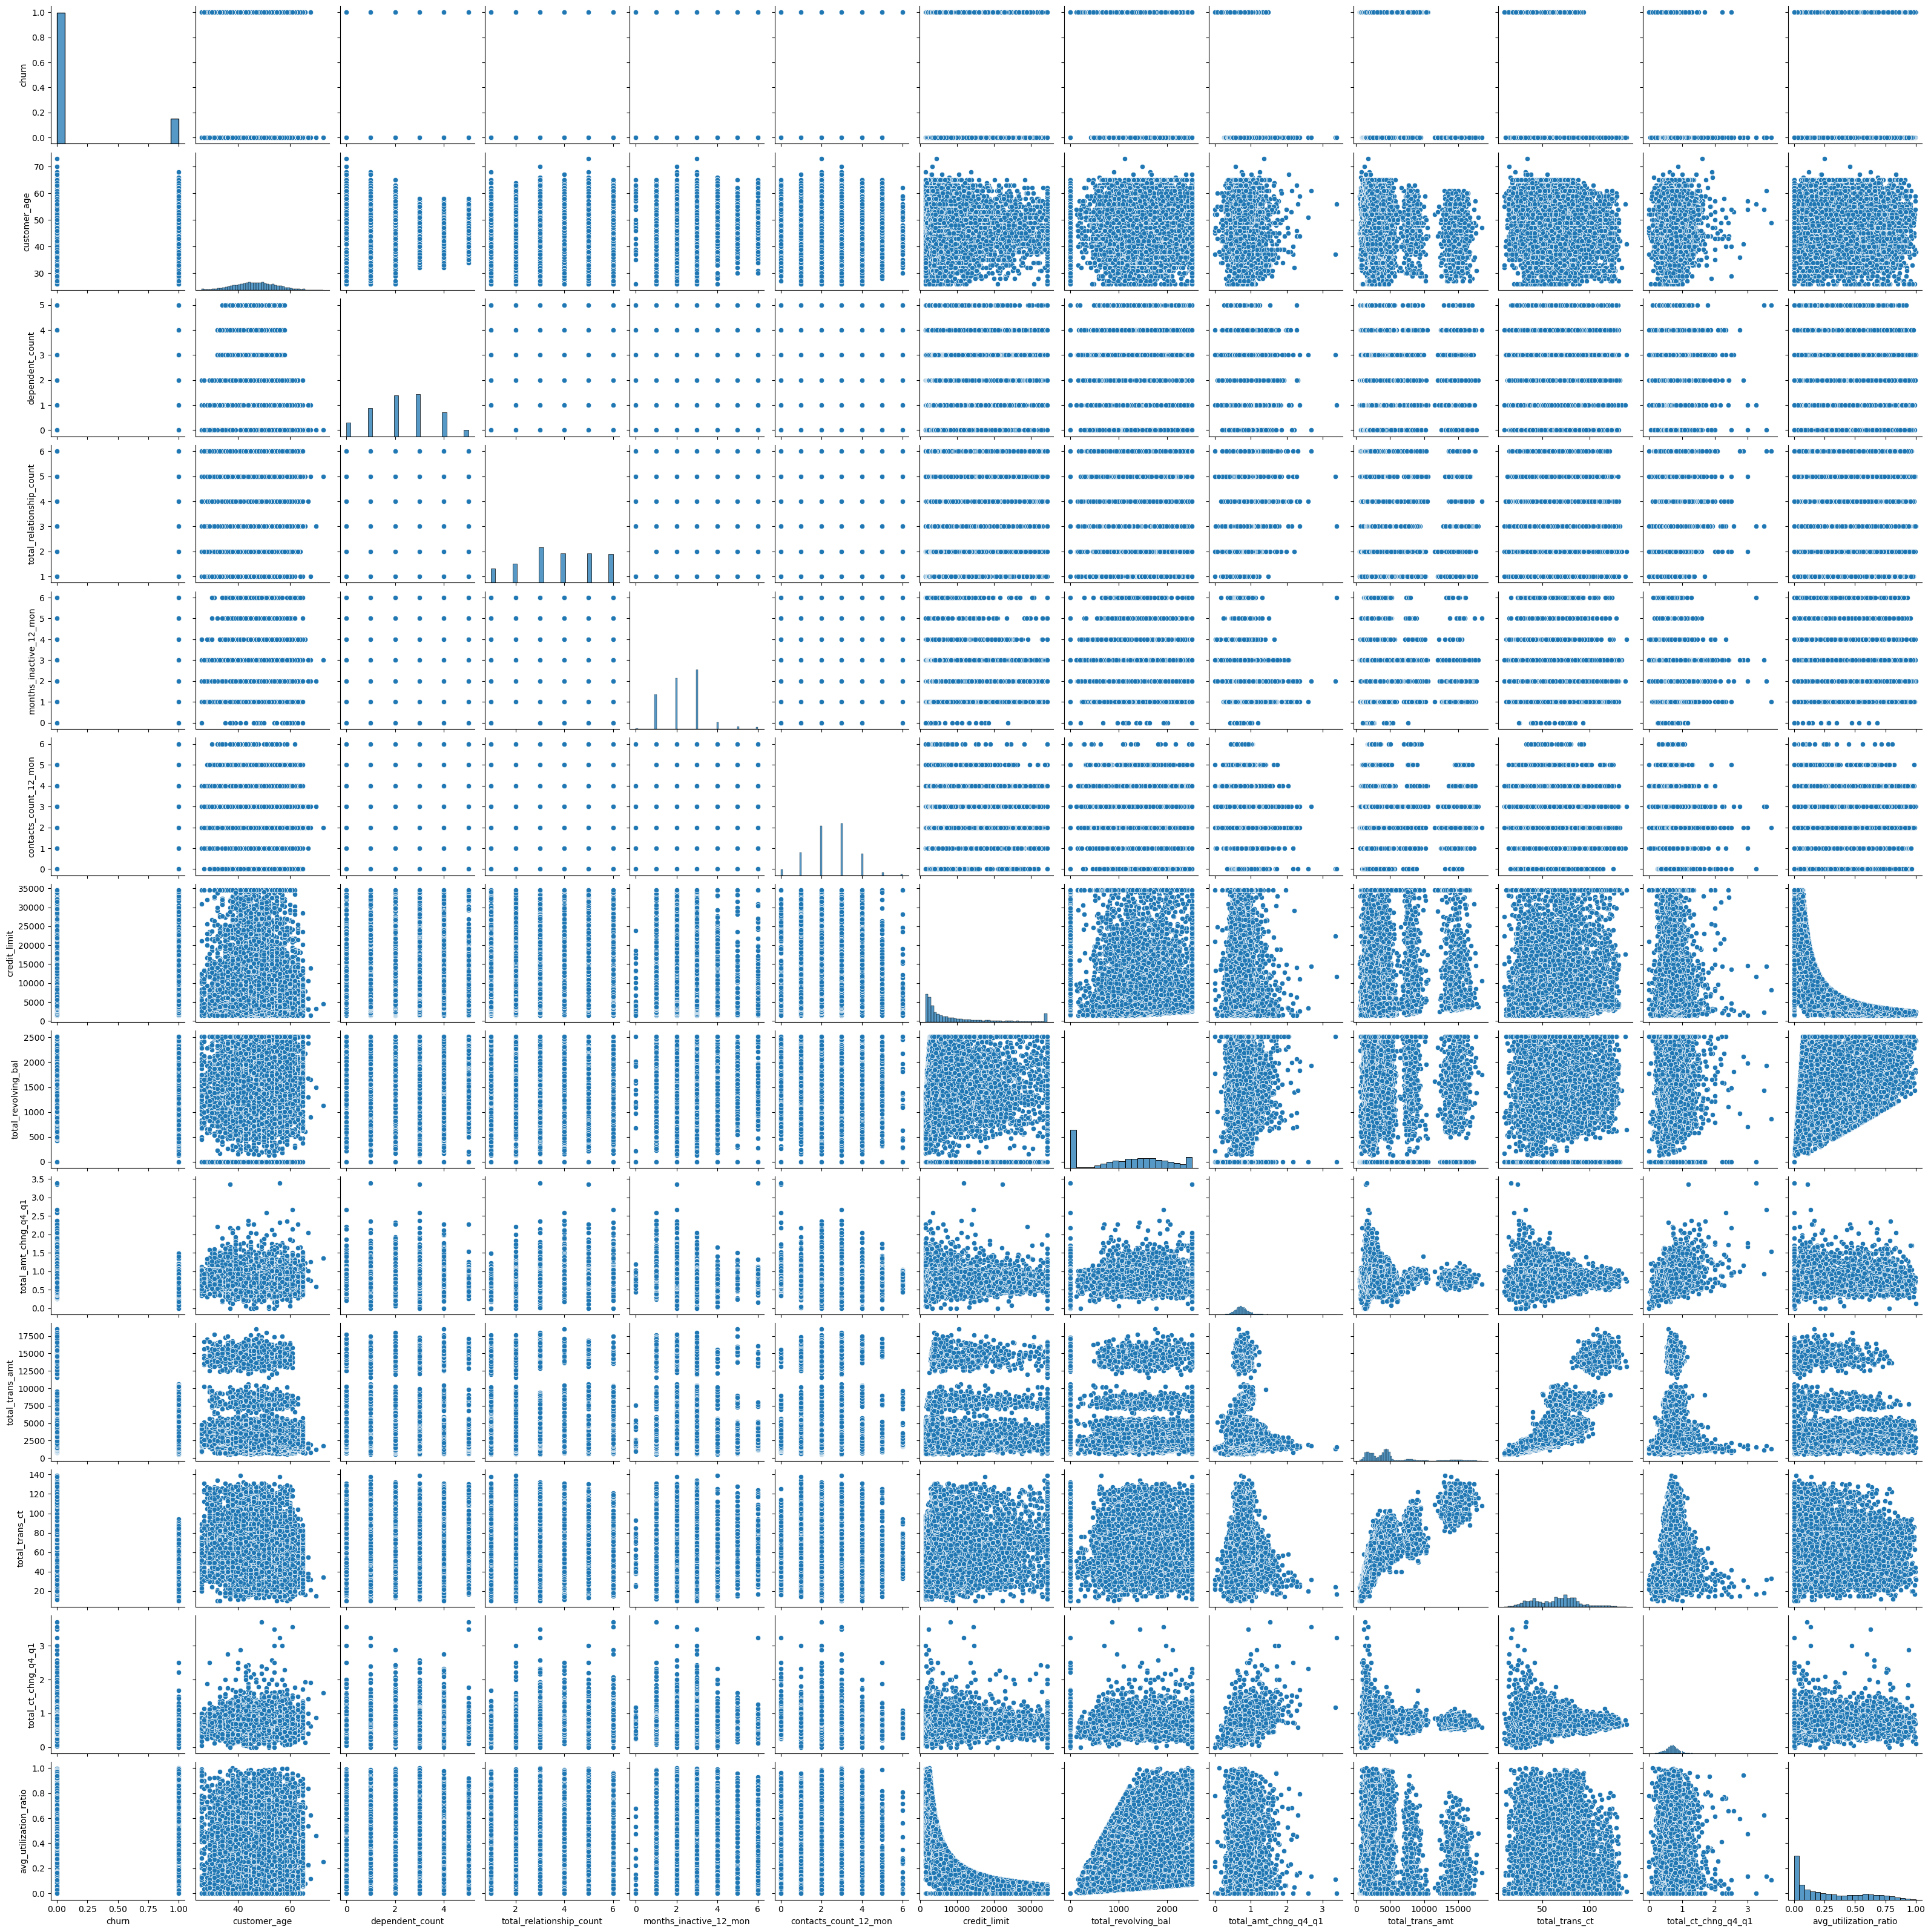

In [481]:
sns.pairplot(df)

<function matplotlib.pyplot.show(close=None, block=None)>

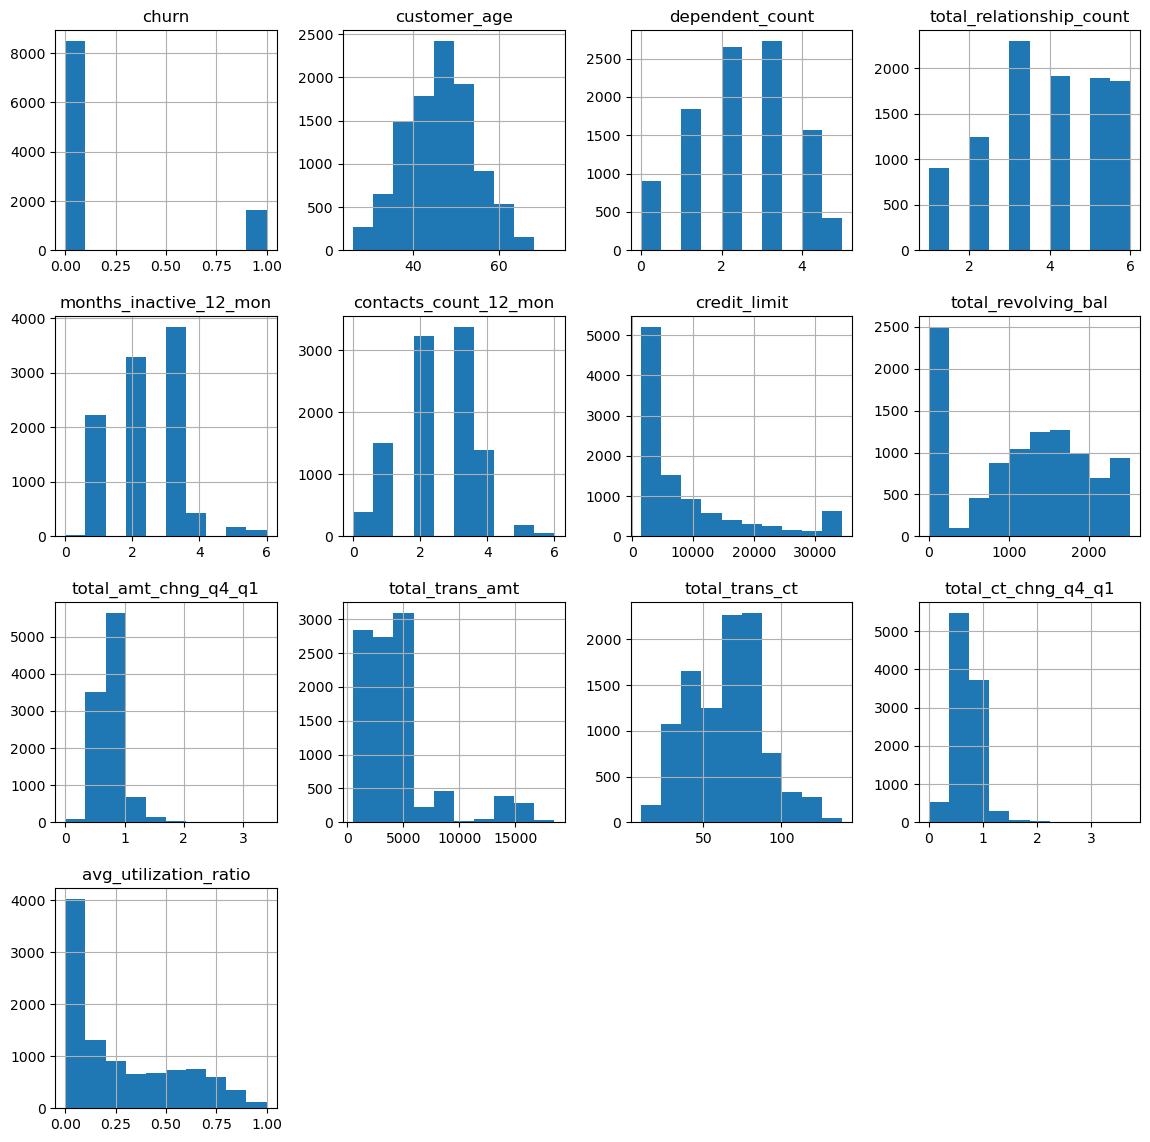

In [482]:
df.hist(figsize=(14,14))
plt.show

1.most frequent dependent count is 3 and 4 

2.clientnum has no obvious correlation to any other parameters. No clear influence on churn. Though there seems to be a large number of small values and large values for client id, but not so many in between. Interesting, but probably not very informative.

3.customer_age looks quite normally distributed, with peak just over 40.

4.dependent_count also looks normally distributed, peaking between 2 and 3 dependents.

5.months_on_book histogram is poorly scaled but looks normal, with an unusual spike at around 35months. Was there some large promotional drive 30months ago that explains this?

6.total_relationship count is reasonably uniform rather than normal, between

# Corelation matrix
###### Correlation is a statistical measure that describes the strength and direction of a linear relationship between two variables. In other words, it quantifies how one variable changes with respect to another variable. Here are the key points about correlation:

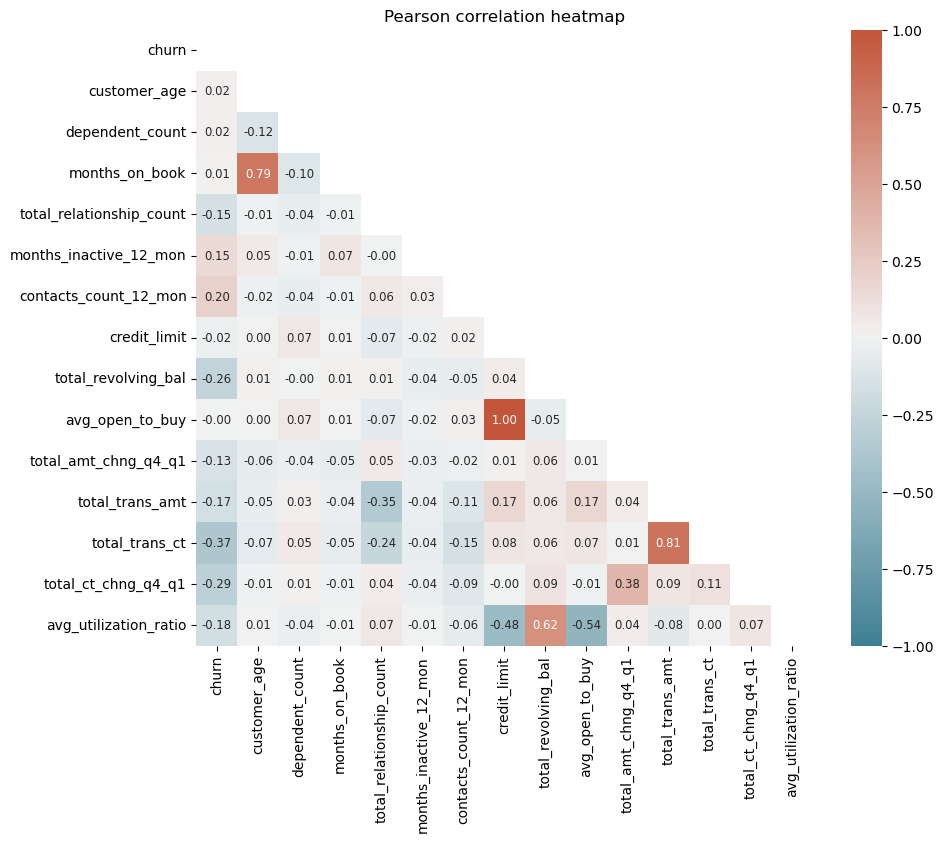

In [389]:
# Plot with mask for triangle plot only
numeric_df = df.select_dtypes(include=[np.number])
def plot_corr_matrix(numeric_df):
    '''Plots formatted correlation matrix for the supplied df.'''
    fig = plt.figure()
    fig.set_size_inches(10,8)
    ax = fig.add_subplot()

    corr_mat = numeric_df.corr()
    mask = np.triu(corr_mat)
    cmap = sns.diverging_palette(220, 20, as_cmap=True)
    sns.heatmap(corr_mat, square=True, mask=mask, cmap=cmap, 
                annot=True, fmt='.2f', vmin=-1, vmax=1,
                annot_kws={'fontsize':'small'},
                ax=ax);
    ax.set_title('Pearson correlation heatmap');
    return corr_mat
    
corr_mat = plot_corr_matrix(numeric_df)

#### Summery on corelation matrix


1. months_on_book vs customer_age

2.total_trans_amt vs total_relationship_count

3.total_trans_ct vs total_relationship_count

4.avg_open_to_buy vs credit_limit
Very co-linear, makes sense as customers with high credit-limit are probably the ones who are quire open to having even more credit.*
5.avg_utilisation_ratio vs credit_limit

6.avg_utilisation_ratio vs total_revolving_bal

7.avg_utilisation_ratio vs avg_open_to_buy

8.total_ct_chng_q4_q1 vs total_amt_chng_q4_q1

These 2 features are inter-related, so makes sense to be highly positive correlation.
9.total_transaction_ct vs total_trans_amt

Again these 2 features are inter-related, so makes sense to be highly positive correlation.
For clarity, print out a list of correlation coeffs vs the dependent variable "churn"

In [390]:
#since avg_to_buy and credit limit both are highly coreelated data and credit_limit is
#more corelated with churn if we compare with avg_open_buy
#and total_trans_amount and total_trans_ct both are silimar



In [391]:
churn                       1.000000
contacts_count_12_mon       0.204491
months_inactive_12_mon      0.152449
dependent_count             0.018991
customer_age                0.018203
months_on_book              0.013687
avg_open_to_buy            -0.000285
credit_limit               -0.023873
clientnum                  -0.046430
total_amt_chng_q4_q1       -0.131063
total_relationship_count   -0.150005
total_trans_amt            -0.168598
avg_utilization_ratio      -0.178410
total_revolving_bal        -0.263053
total_ct_chng_q4_q1        -0.290054
total_trans_ct             -0.371403

SyntaxError: invalid syntax (3512821391.py, line 1)

#  Univariate analysis

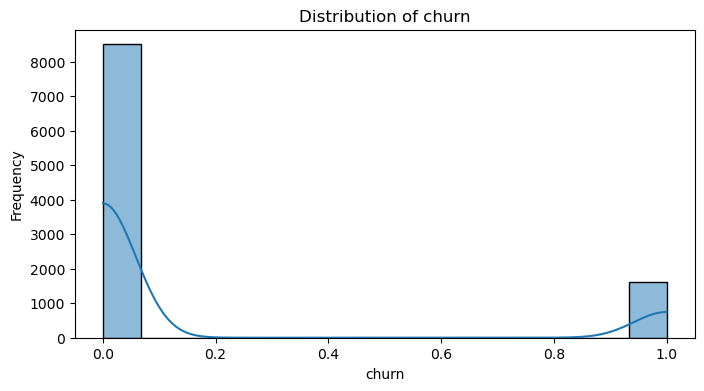

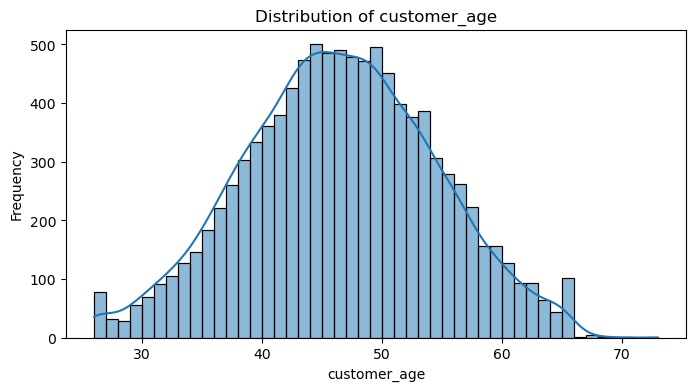

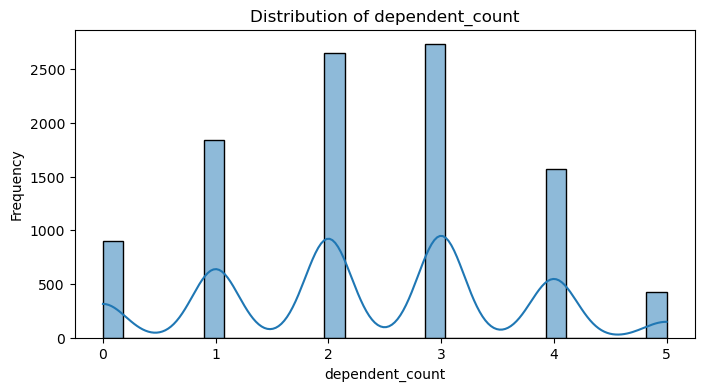

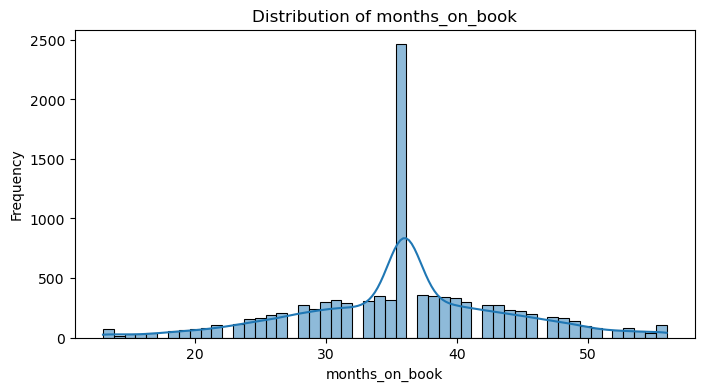

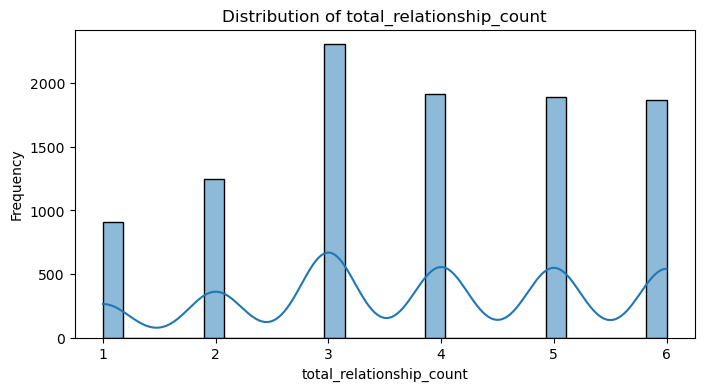

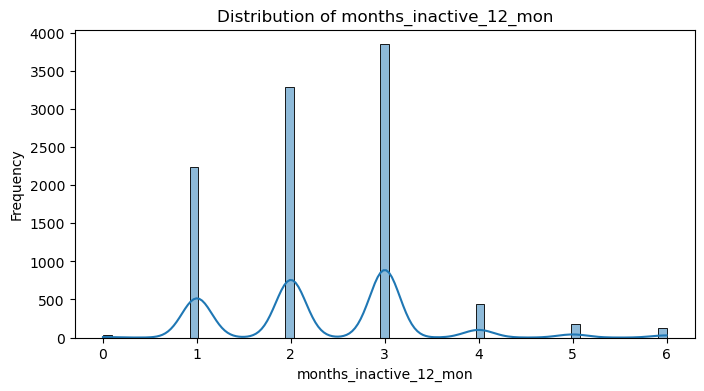

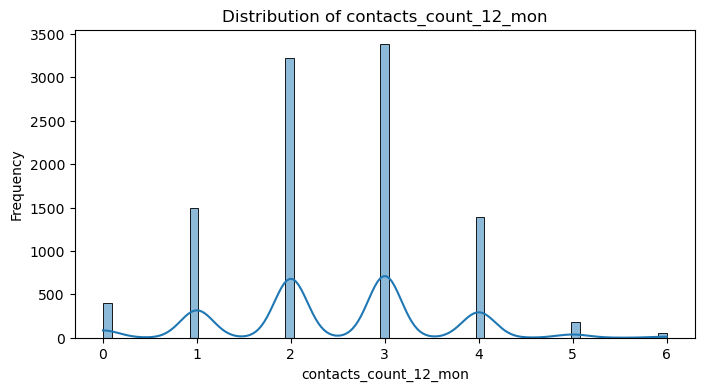

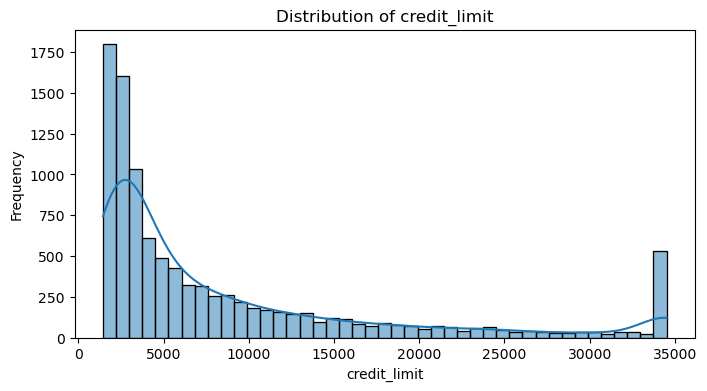

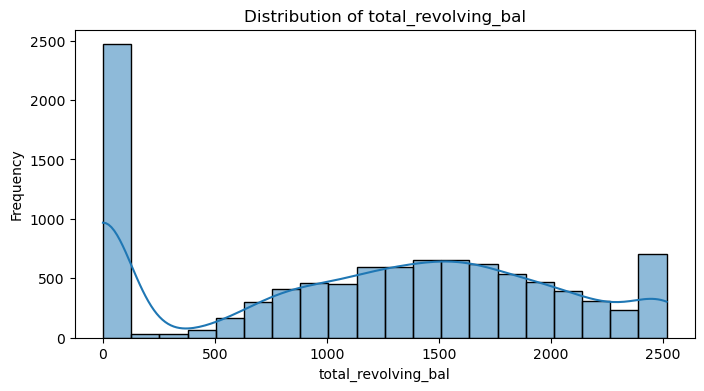

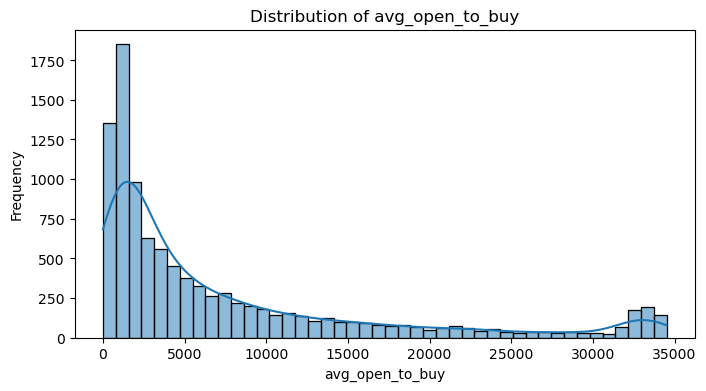

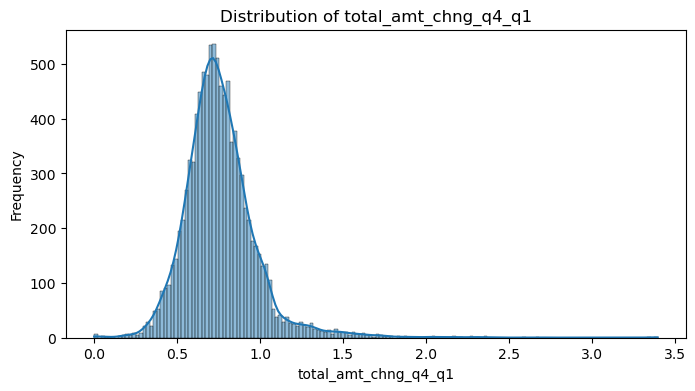

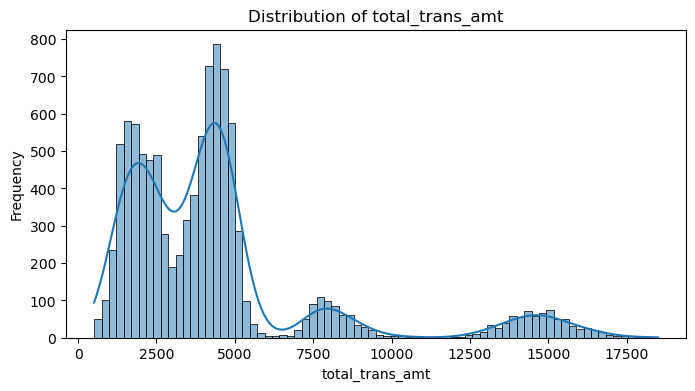

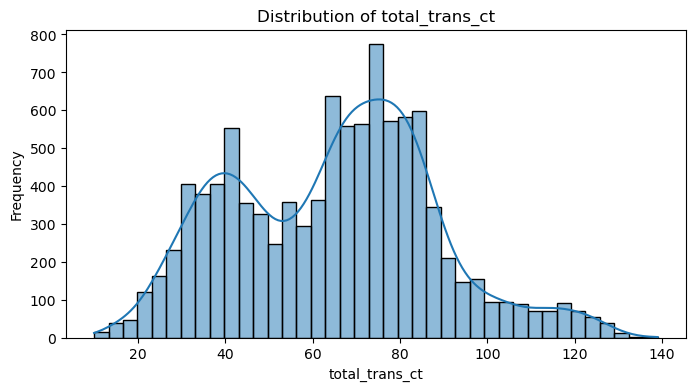

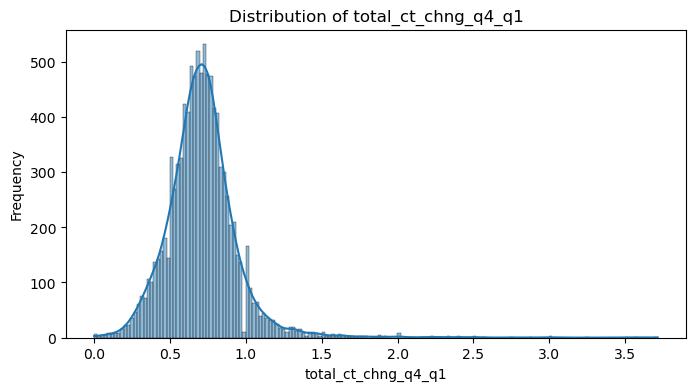

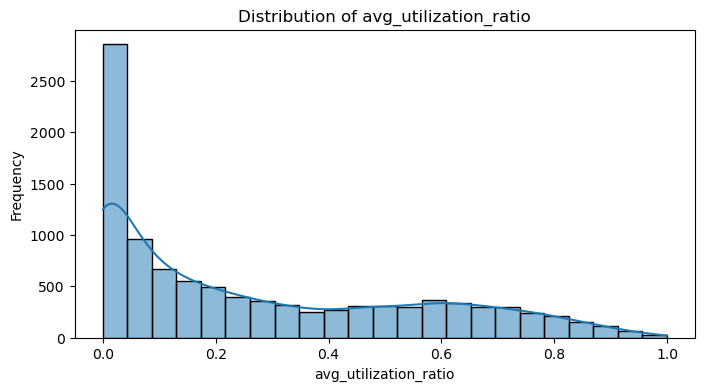

In [392]:
import seaborn as sns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
# Assuming df is your DataFrame
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [393]:
#checking the skewness of the numeric variables
for col in numeric_columns:
    print(f'Skewness of {col}: {df[col].skew()}')

Skewness of churn: 1.8484488579523548
Skewness of customer_age: -0.033605016317173456
Skewness of dependent_count: -0.020825535616339912
Skewness of months_on_book: -0.10656535989402989
Skewness of total_relationship_count: -0.16245241498173682
Skewness of months_inactive_12_mon: 0.6330611289713137
Skewness of contacts_count_12_mon: 0.011005626218976492
Skewness of credit_limit: 1.666725807993647
Skewness of total_revolving_bal: -0.14883725028007228
Skewness of avg_open_to_buy: 1.6616965459311595
Skewness of total_amt_chng_q4_q1: 1.7320634114286038
Skewness of total_trans_amt: 2.0410034025756936
Skewness of total_trans_ct: 0.15367306849872275
Skewness of total_ct_chng_q4_q1: 2.0640305679077477
Skewness of avg_utilization_ratio: 0.7180079967731994


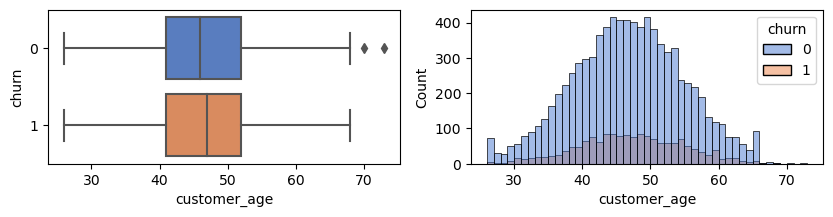

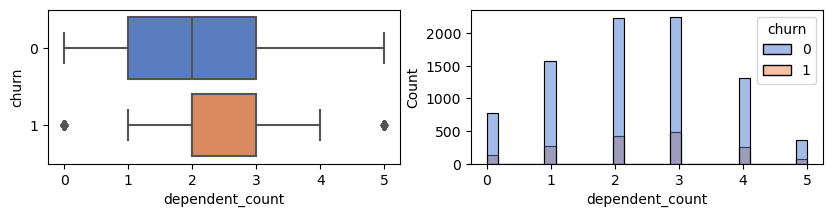

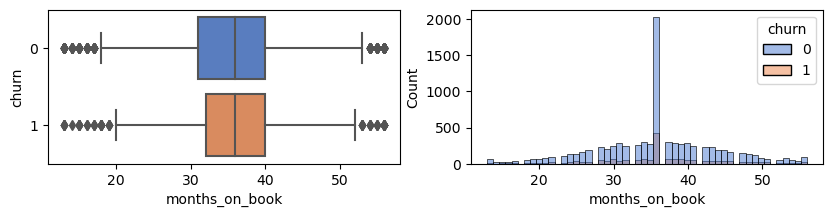

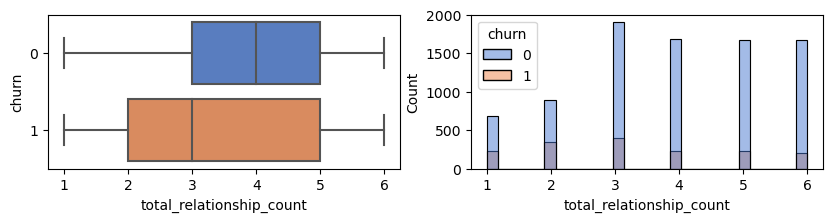

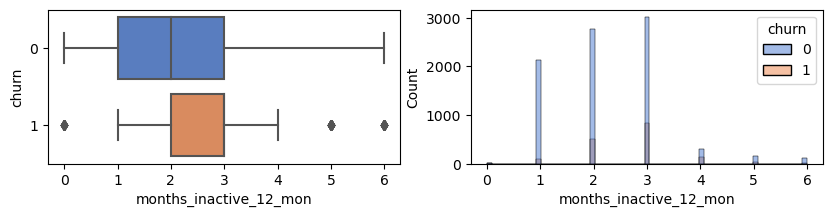

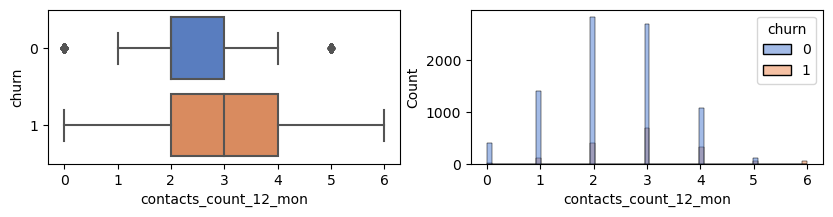

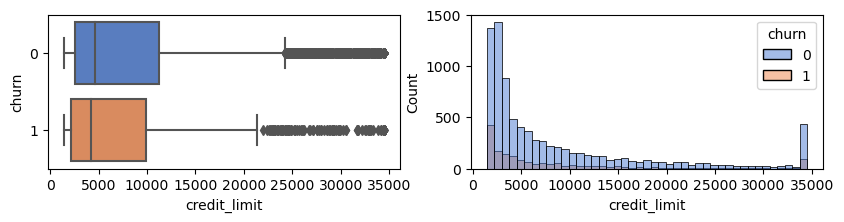

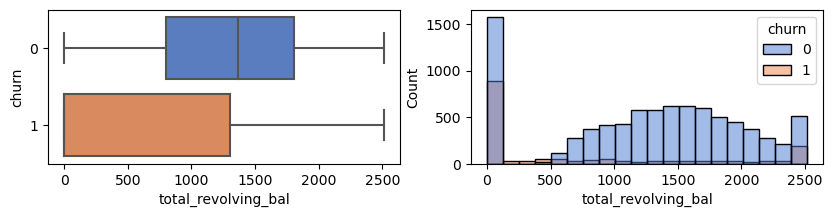

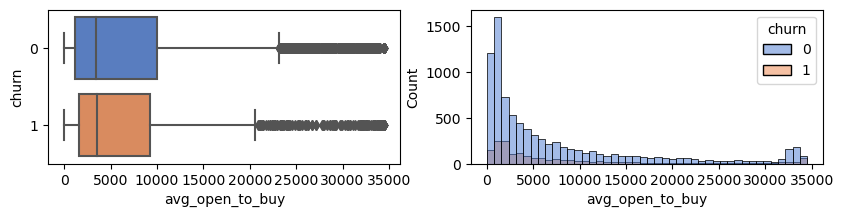

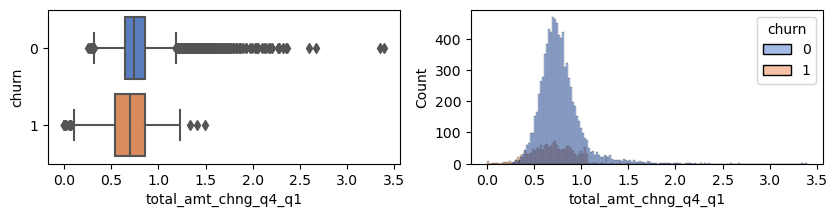

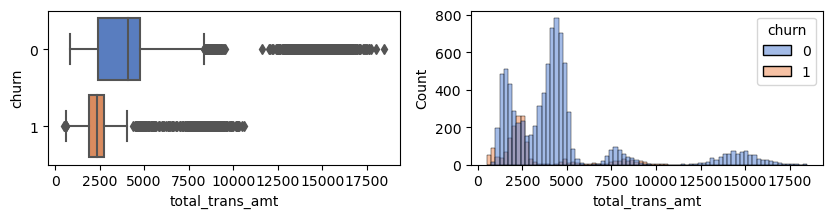

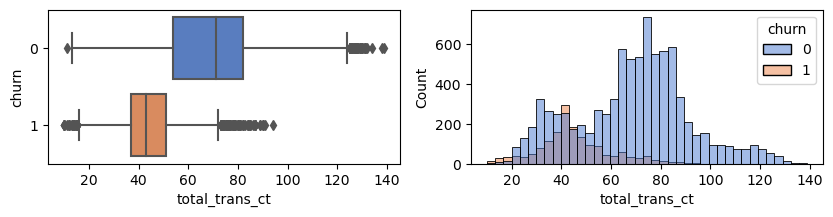

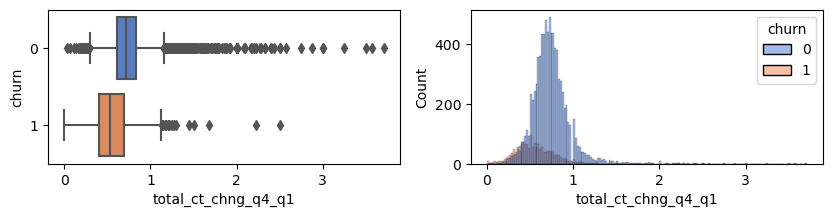

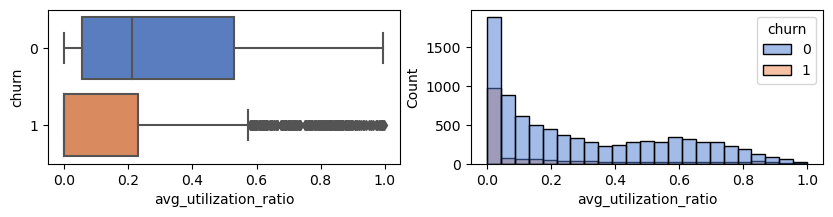

In [394]:
def plot_vs_churn(df,col):
    ''' plot a side-by-side boxplot and histogram for  both churn==0and 1'''
    fig=plt.figure(figsize=(10,2))
    ax=fig.add_subplot(1,2,1)
    sns.boxplot(data=df,x=col,y='churn',orient='h', palette='muted')
    
    ax=fig.add_subplot(1,2,2)
    sns.histplot(data=df,x=col,hue='churn', palette='muted')
    #fig.subtitle(f'Distributions of "{col}" grouped by "churn")
                 
for col in numeric_df:
                 if col=='churn':continue
                 plot_vs_churn(df,col)

<p>Transformations can reduce the influence of extreme values, making them less impactful on the model<P

# Visulization

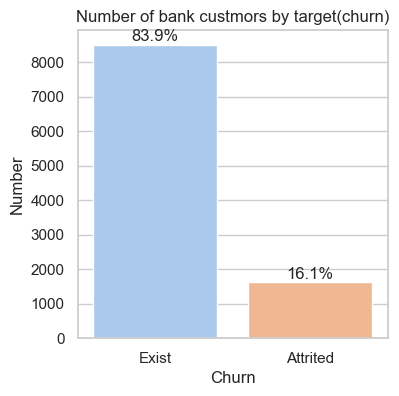

In [42]:
sns.set_theme(style="whitegrid")
#"whitegrid" means that the plots will have a white background with gridlines.

chart='Number of bank custmors by target(churn)'

plt.figure(figsize=(4,4))
plt.title(chart)
#The plt.suptitle() function in Matplotlib is used to add a title to the entire figure, rather than to individual subplots.
#The y parameter controls the vertical position of the title. The default value is typically around 0.98,
#which positions the title slightly above the top of the figure. Setting y=1 positions the title exactly 
#at the top of the figure. Adjusting this value can help with better positioning of the title,
#especially if there are other elements or annotations in the figure.


#plotting countplot based on target variable(churn)
gp = sns.countplot(x='churn', data=df, palette='pastel')
#palette: This parameter specifies the color palette to use for the plo
gp.set(ylabel='Number', xlabel='Churn')
plt.xticks([0,1],['Exist','Attrited'],fontsize=11)

# annotate the percentage on the chart
#bar means patch
total = len(df['churn'])
for p in gp.patches:
            height = p.get_height()
            percentage = (height / total) * 100
            gp.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2, height+20), \
                            ha='center', va='bottom', fontsize=12)

plt.show()



### The graph above shows the distribution of the target variable, it is known that the number of Churn bank customer is 16.1%. It is concluded that there is an imbalance in the data on the target variable.

### Information:
Retain: Churn refers to the situation where customers or users of a product, service, or subscription discontinue their usage or cancel their subscription.
Churn: Retain refers to the opposite of churn. It represents the ability of a business to keep its existing customers.

In [110]:
# parameter description
"""
Parameters:
    data (DataFrame): The input data.
    column (str): The variable to be plotted on the x-axis (or y-axis, based on the `orient` parameter).
    hue (str): The third variable to differentiate categories (optional).
    label (str): The label for the variable on the x-axis (or y-axis).
    max_sample (int): The maximum number of categories to be shown on the plot.
    num_x_ticks (int): The number of x-axis ticks to be customized.
    x_ticks (list): The list of x-axis tick labels to be customized.
    width (float): The width of the plot.
    height (float): The height of the plot.
    y_title (float): The distance between the title and the plot.
    orient (str): The orientation of the plot ('vertical' or 'horizontal').
    title (str): The title of the plot.
"""

"\nParameters:\n    data (DataFrame): The input data.\n    column (str): The variable to be plotted on the x-axis (or y-axis, based on the `orient` parameter).\n    hue (str): The third variable to differentiate categories (optional).\n    label (str): The label for the variable on the x-axis (or y-axis).\n    max_sample (int): The maximum number of categories to be shown on the plot.\n    num_x_ticks (int): The number of x-axis ticks to be customized.\n    x_ticks (list): The list of x-axis tick labels to be customized.\n    width (float): The width of the plot.\n    height (float): The height of the plot.\n    y_title (float): The distance between the title and the plot.\n    orient (str): The orientation of the plot ('vertical' or 'horizontal').\n    title (str): The title of the plot.\n"

In [111]:
def countplot_univariate(data,column,hue,label,max_sample,num_x_ticks,x_ticks,width,height,y_title,orient,title):
    
    #create a new figure with the specified width,height and title
    plt.figure(figsize=(width,height))
    plt.suptitle(f'{title}',y=y_title)
    
    # determine the order of the categories based on the maximum sample size
    order=data[column].value_counts().nlargest(max_sample).index if max_sample>0 else data[column].value_counts().index
    
    #create a countplot on the specified orientation
    if orient =='vertical':
        g=sns.countplot(x=column,hue=hue,order=order,data=data,palette='pastel')
        g.set(xlabel=label,ylabel='Number')
    elif orient=='horizontal':
         g = sns.countplot(y=column, hue=hue, order=order, data=data, palette='muted')
         g.set(xlabel='Number', ylabel=label)
    plt.legend(title='Exited', labels=['Exist', 'attited'], fontsize=11)
      # customize the x-axis ticks if the number of ticks is specified
    if num_x_ticks > 0:
        x_ticks_list = list(range(num_x_ticks))
        plt.xticks(x_ticks_list, x_ticks, fontsize=11)
        
    
    # calculate the total number of observations
    total = len(data[column])
    
       # add percentage annotations to the bars
    for p in g.patches:
        if orient == 'vertical':
            height = p.get_height()
            percentage = (height / total) * 100
            g.annotate(f'{percentage:.1f}%', (p.get_x() + (p.get_width() + 0.05) / 2, height + 50), \
                            ha='center', va='bottom', fontsize=12)
        elif orient == 'horizontal':
            width = p.get_width()
            percentage = (width / total) * 100
            g.annotate(f'{percentage:.1f}%', (width + 25, p.get_y() + p.get_height() / 2), \
                       ha='left', va='center', fontsize=11)
            
    plt.show()
    
    
    
    
        

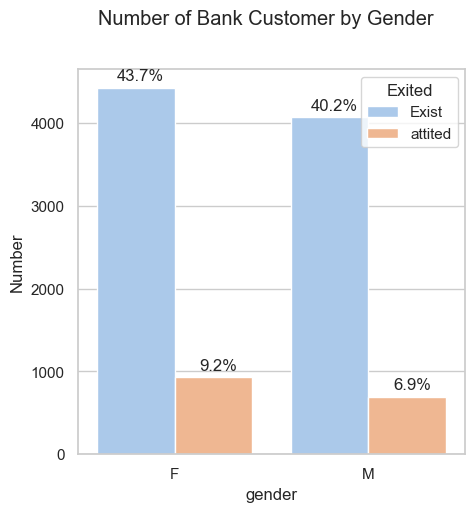

In [112]:
# initialize chart title
chart = 'Number of Bank Customer by Gender'

# apply the procedure to plot the chart
countplot_univariate(df, 'gender', 'churn', 'gender', 0, 0, None, 5, 5, 1, 
                     'vertical', chart)

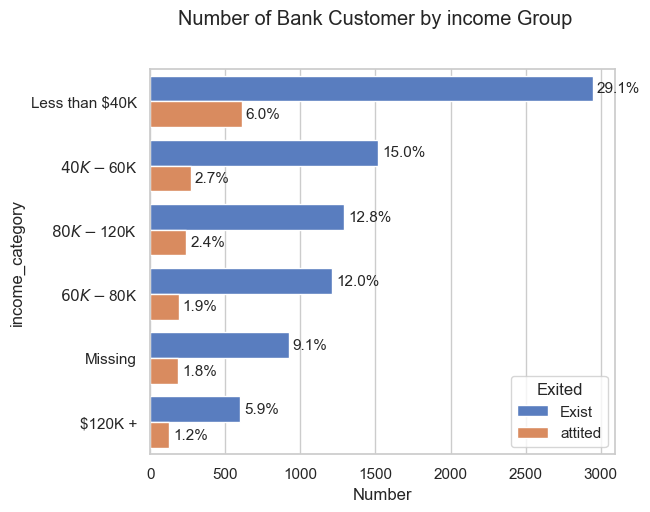

In [113]:
# initialize chart title
chart = 'Number of Bank Customer by income Group'

# apply the procedure to plot the chart
countplot_univariate(df, 'income_category', 'churn', 'income_category', 0, 0, None, 6, 5, 1, 
                     'horizontal', chart)

### The graph above shows the distribution of target variables by 'income Group'. Bank customers in the Less then 40k incomee group have a higher churn percentage than other age groups at 6.0%..

# Information:
Retain: Churn refers to the situation where customers or users of a product, service, or subscription discontinue their usage or cancel their subscription.
Churn: Retain refers to the opposite of churn. It represents the ability of a business to keep its existing customers.

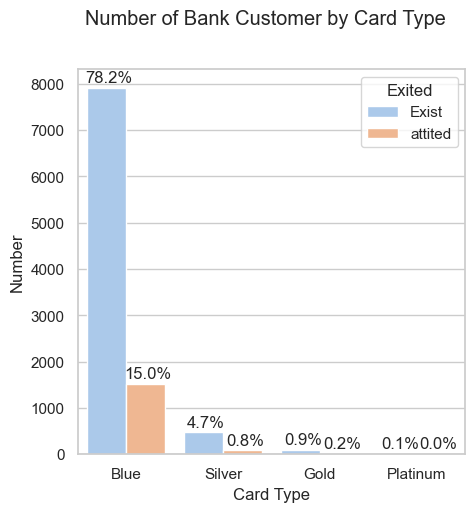

In [114]:
# initialize chart title
chart = 'Number of Bank Customer by Card Type'

# apply the procedure to plot the chart
countplot_univariate(df, 'card_category', 'churn', 'Card Type', 0, 0, None, 5, 5, 1, \
                     'vertical', chart)

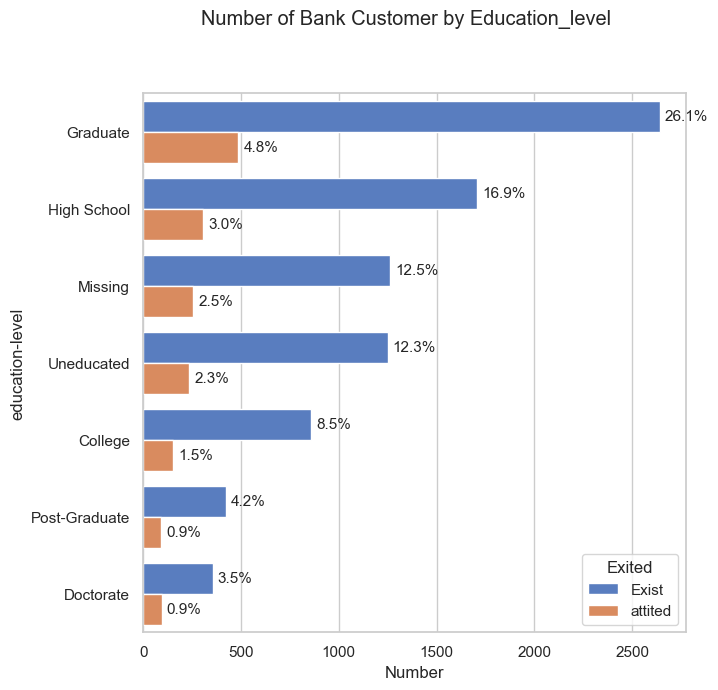

In [115]:
# initialize chart title
chart = 'Number of Bank Customer by Education_level'

# apply the procedure to plot the chart
countplot_univariate(df, 'education_level', 'churn', 'education-level', 0, 0, None, 7, 7, 1, \
                     'horizontal', chart)

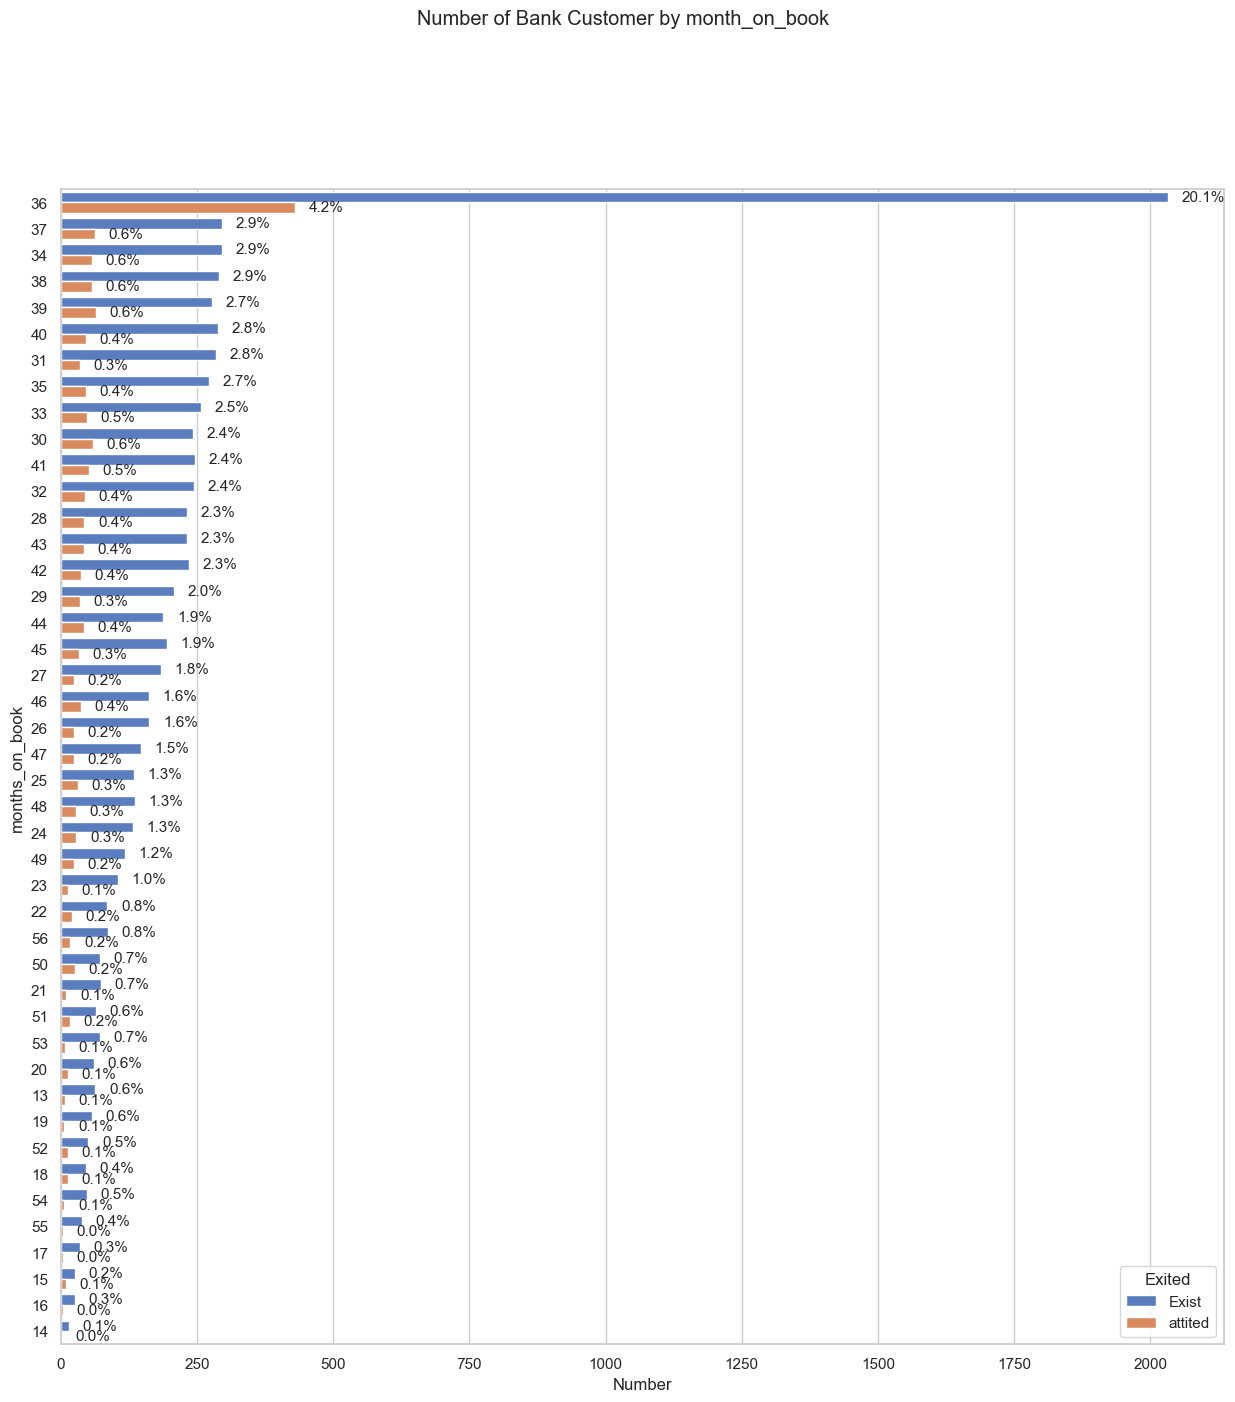

In [116]:
# initialize chart title
chart = 'Number of Bank Customer by month_on_book'

# apply the procedure to plot the chart
countplot_univariate(df, 'months_on_book', 'churn', 'months_on_book', 0, 0, None, 15, 15, 1, \
                     'horizontal', chart)

In [117]:
df[df.churn == 1].describe(include='category')

gender education_level marital_status income_category card_category
count    1627            1627           1627            1627          1627
unique      2               7              4               6             4
top         F        Graduate        Married  Less than $40K          Blue
freq      930             487            709             612          1519

In [118]:
df[df.churn == 0].describe(include='category')

gender education_level marital_status income_category card_category
count    8500            8500           8500            8500          8500
unique      2               7              4               6             4
top         F        Graduate        Married  Less than $40K          Blue
freq     4428            2641           3978            2949          7917

In [427]:
df.drop(columns=['avg_open_to_buy','months_on_book'],inplace=True)

# Outlier Detection and Capping 

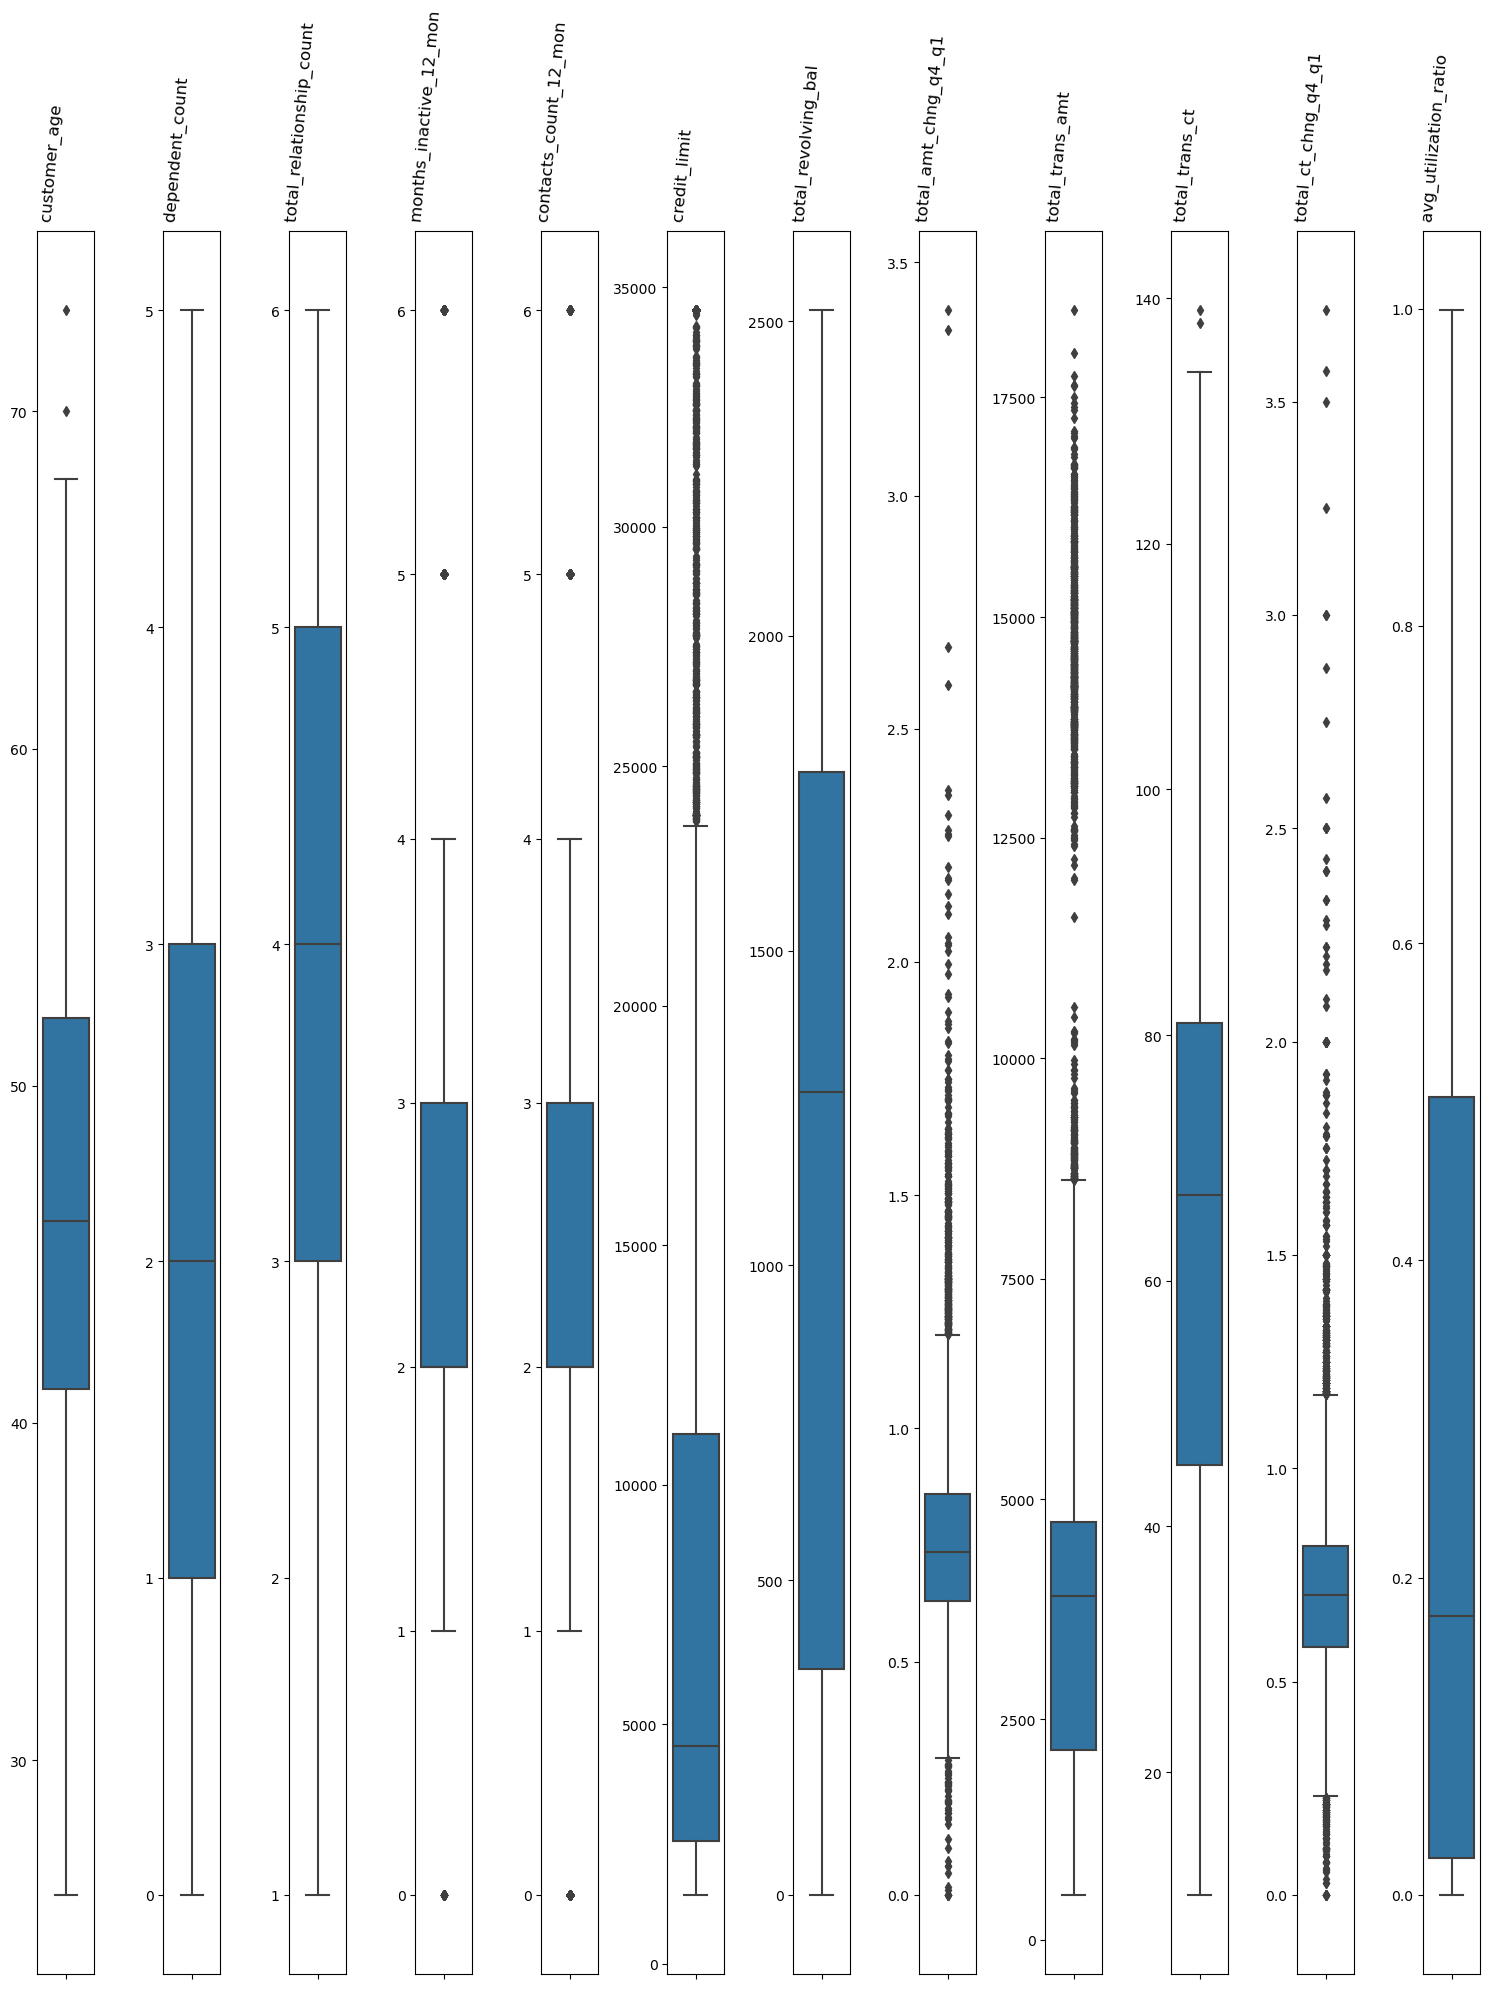

In [433]:
# Select numeric columns
X=df.drop(columns=['churn'])
y=df['churn']
numeric_columns = X.select_dtypes(include='number').columns

# Set up the matplotlib figure
plt.figure(figsize=(15, 20))

# Plot each numeric column in the DataFrame as a separate subplot
for i, column in enumerate(numeric_columns, 1):
    ax=plt.subplot(1, len(numeric_columns), i)
    sns.boxplot(y=df[column])
    plt.title(f' {column}')
    plt.setp(ax.title, rotation=85, ha="right")  # Rotate the title
    plt.ylabel('')  # Remove y-axis label to avoid clutter

# Adjust layout
plt.tight_layout()
plt.show()


In [434]:
for column in X.select_dtypes(include=['int', 'float']).columns:  
   
    Q1 = X[column].quantile(0.25) 
    Q3 = X[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
        
    # Count the number of outliers
    count=X[(X[column] < lower_bound) | (X[column] > upper_bound)][column].count()
    total_count=X[column].count()
    percentage_outlier=count/total_count*100
    print(f"{column}: {round(percentage_outlier, 2)}%")
    
     # Capping outliers
    X[column] = X[column].clip(lower=lower_bound, upper=upper_bound)

customer_age: 0.02%
dependent_count: 0.0%
total_relationship_count: 0.0%
months_inactive_12_mon: 3.27%
contacts_count_12_mon: 6.21%
credit_limit: 9.72%
total_revolving_bal: 0.0%
total_amt_chng_q4_q1: 3.91%
total_trans_amt: 8.85%
total_trans_ct: 0.02%
total_ct_chng_q4_q1: 3.89%
avg_utilization_ratio: 0.0%


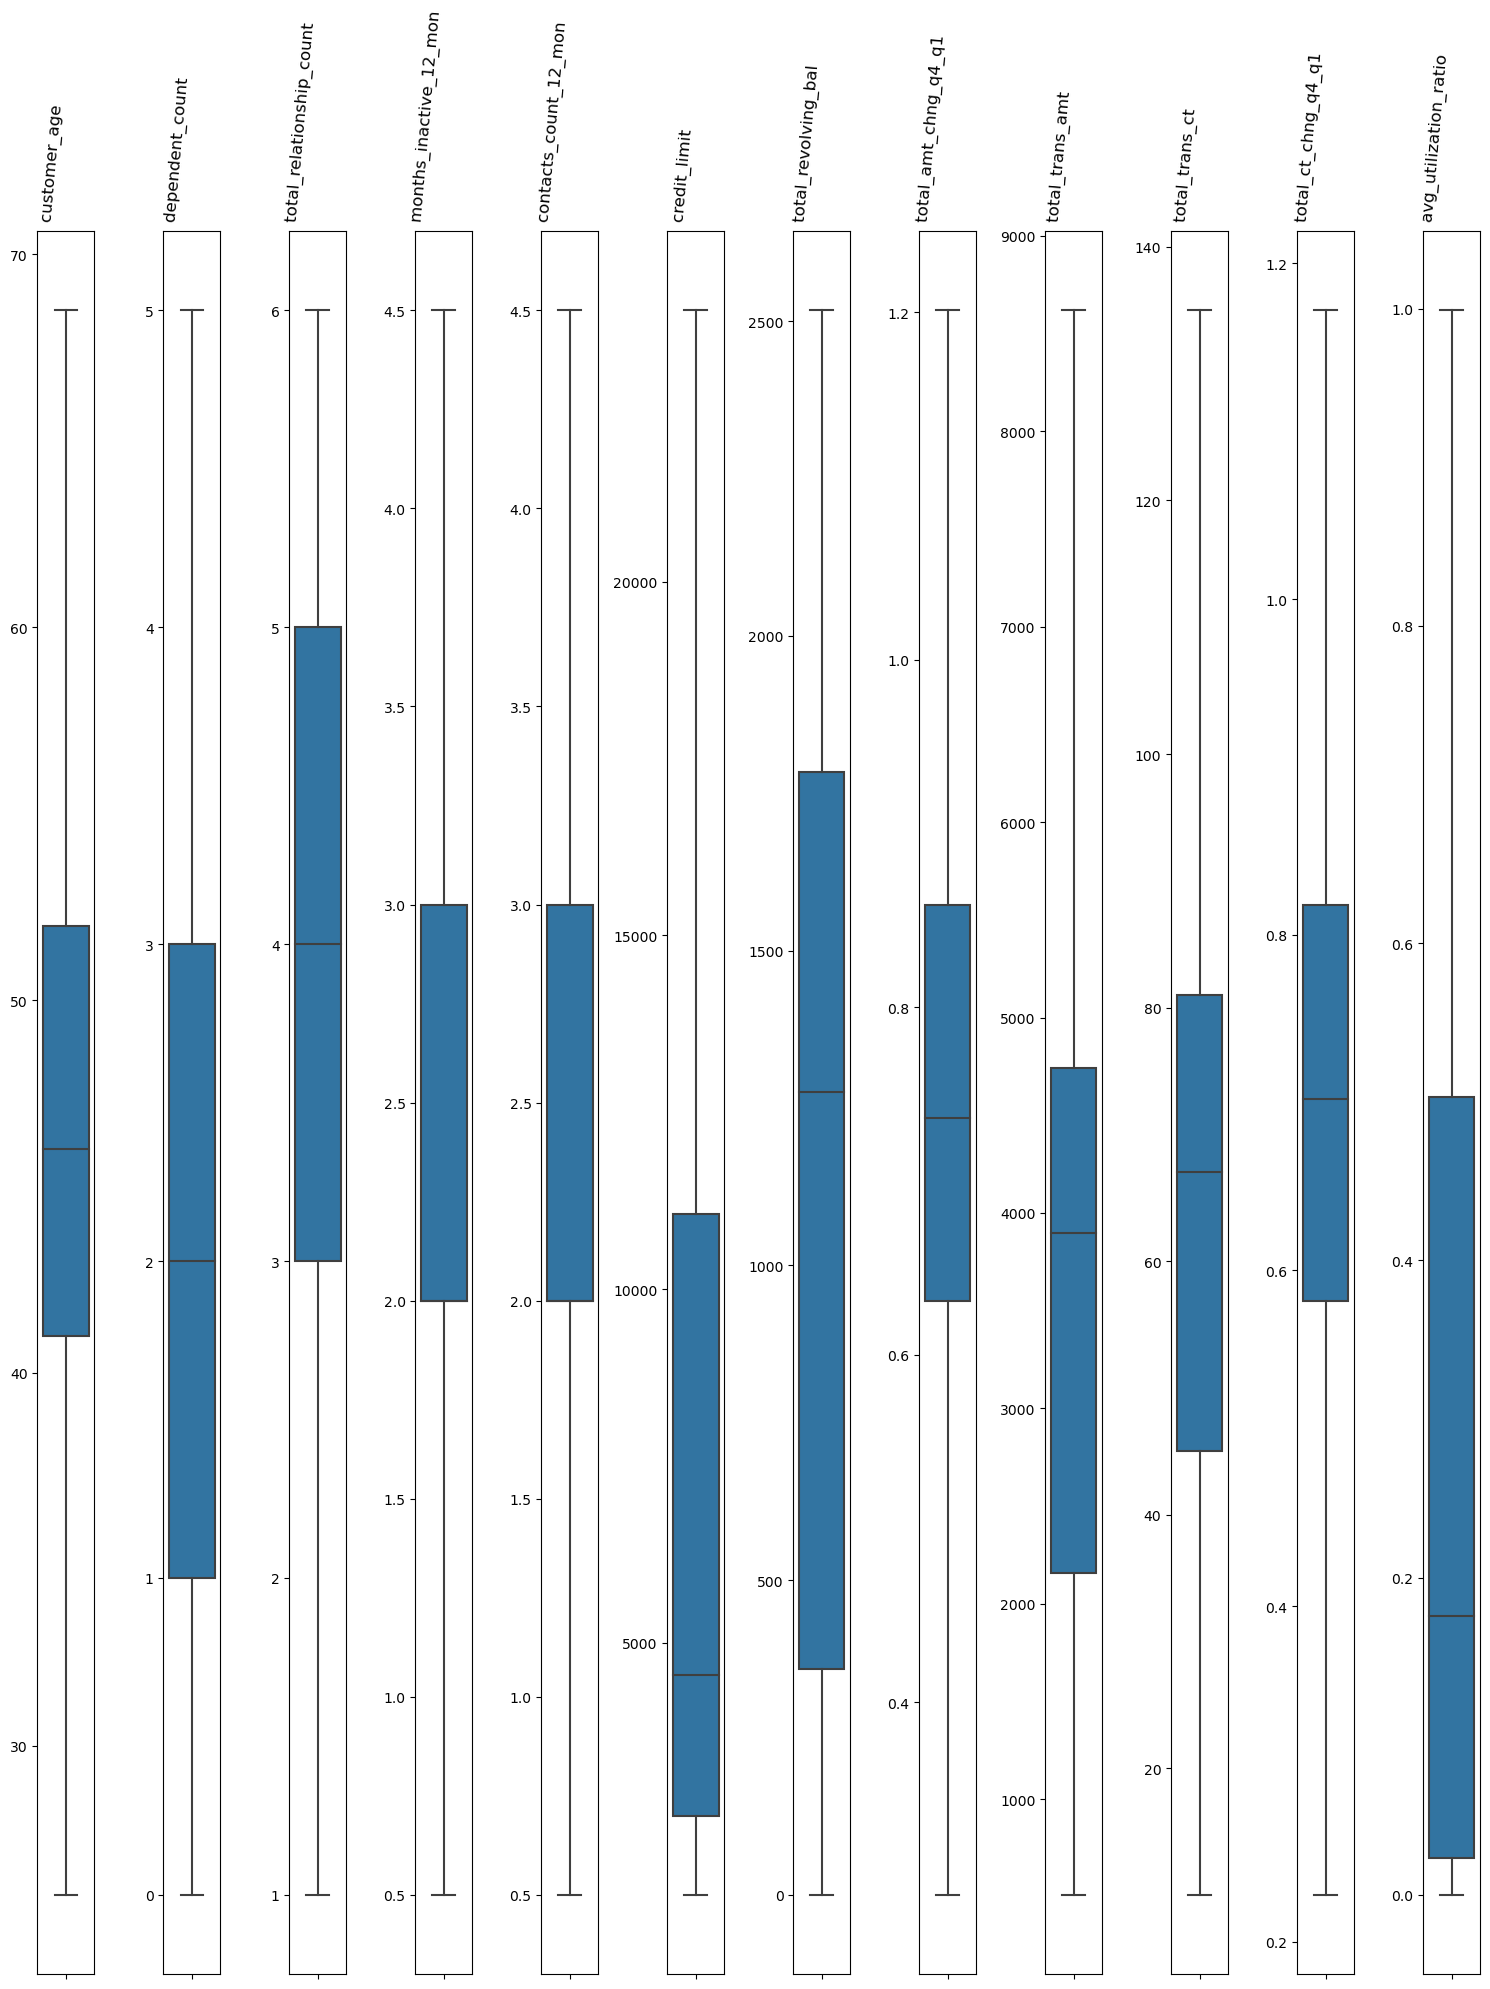

In [435]:
plt.figure(figsize=(15, 20))

# Plot each numeric column in the DataFrame as a separate subplot
for i, column in enumerate(numeric_columns, 1):
    ax=plt.subplot(1, len(numeric_columns), i)
    sns.boxplot(y=X[column])
    plt.title(f' {column}')
    plt.setp(ax.title, rotation=85, ha="right")  # Rotate the title
    plt.ylabel('')  # Remove y-axis label to avoid clutter

# Adjust layout
plt.tight_layout()
plt.show()

1.Since avg_to_buy and credit limit both are highly coreelated data and credit_limit is
  more corelated with churn comparitevly with avg_open_buy

2.total_trans_amount and total_trans_ct both are silimar

In [436]:
X.shape

(10127, 17)

# Modeling

In [437]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.metrics import  roc_auc_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE
from sklearn.inspection import permutation_importance

from sklearn.base import TransformerMixin, BaseEstimator
#from sklearn.metrics import plot_roc_curve
import time
from sklearn.metrics import  make_scorer




In [438]:
X_train_,X_test_,y_train,y_test=train_test_split(X,y,test_size=0.2
                                            ,random_state=42)

In [439]:

print(X_train_.shape)
print(X_test_.shape)
print(y_train.shape)
print(y_test.shape)

(8101, 17)
(2026, 17)
(8101,)
(2026,)


### Base line model 

In [440]:
dummy_clf = DummyClassifier(strategy='prior')
dummy_clf.fit(X_train_, y_train)
y_pred = dummy_clf.predict(X_test_)

accuracy_score(y_test, y_pred)

0.8385982230997039

# Construct preprocessing Pipeline
Numerical features
Include an imputation step for numerical features, even though there are no NaN values in this dataset, it is a good practice in-case the training is re-run on data with NaN values. Use a "median" imputation strategy as this is a good baseline, not too skewed by outliers.

Categorical features
Use onehot encoding for categorical features. Will probably try ordinal encoder on some features, as they have a certain "order" to them (like income values).

In [441]:
# Numerical preprocessor
num_features = X_train_.select_dtypes(include=['int','float']).columns.tolist()
num_transformer = Pipeline([('imputer', SimpleImputer(strategy='mean')),
                            ('scaler', StandardScaler())])

# Ordinal features
ord_features = ['education_level']

ord_transformer =Pipeline([('encoding',OrdinalEncoder(categories=[['Missing','Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate']]))])

# Categorical preprocessor
cat_features = ['gender', 'marital_status', 'income_category', 'card_category']
cat_transformer = Pipeline([('encode',OneHotEncoder( handle_unknown='ignore'))])

# Combined preprocessor
preprocessor = ColumnTransformer([('ords', ord_transformer, ord_features),
                                  ('cats', cat_transformer, cat_features),
                                  ('nums', num_transformer, num_features)],
                                 remainder='drop')

In [442]:
X_train=preprocessor.fit_transform(X_train_)
X_test=preprocessor.transform(X_test_)
print(X_train.shape)
print(X_test.shape)

(8101, 29)
(2026, 29)


# Model Evaluation Function

In [465]:
def evaluate_clf(clf, clf_name, X_train, y_train, X_test, y_test, param_grid):
    
    print('Compute a dict of metrics for easy comparison of various models')
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    y_test_proba = clf.predict_proba(X_test)[:, 1]  # For binary classification
    
    # Plotting
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(f'Name: {clf_name}')
    
    PrecisionRecallDisplay.from_estimator(clf, X_test, y_test, ax=axs[0])
    axs[0].set_title('Precision-Recall curve')
    
    RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=axs[1])
    axs[1].set_title('ROC curve')
    
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, ax=axs[2])
    axs[2].set_title('Confusion Matrix')
    
    plt.tight_layout()
    plt.show()
    
    # Print metrics
    print("Classification report:\n", classification_report(y_test, y_test_pred))
    print(f'1. Training time taken by {clf_name}: {end - start:.2f} seconds')
    print(f'2. ROC-AUC Score: {roc_auc_score(y_test, y_test_proba):.2f}')
    print(f'3. Accuracy on training data: {accuracy_score(y_train, y_train_pred):.2f}')
    
    # Grid search for hyperparameter tuning
    print('\n\n\n')
    print('Grid-search CV')
    grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    
    # Fit the grid search to the data
    from joblib import parallel_backend

    with parallel_backend('threading'):
        grid_search.fit(X_train, y_train)
  
    
    print('Best parameters:\n', grid_search.best_params_)
    print('Best score (on train set):', grid_search.best_score_)
    
    # Train the final model with the best parameters
    best_model = grid_search.best_estimator_
    
    # Predict and evaluate on the test set
    y_pred_ = best_model.predict(X_test)
    print("Classification report with best parameters:\n", classification_report(y_test, y_pred_))


In [464]:
def smote_predict(classifier,X_train,X_test,y_train,y_test):
    smote = SMOTE(random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
    print(pd.Series(y_train).value_counts())
    print('\nAfter smote')
    print(pd.Series(y_train_res).value_counts())
    classifier.fit(X_train_res, y_train_res)
    y_train_pred=classifier.predict(X_train)
    y_test_pred=classifier.predict(X_test)
    fig,axs=plt.subplots(1,3)
    fig.set_size_inches(10,4)
    #fig.suptitle(f'Name:{clf_name}')
    plt.tight_layout()
    axs[0].set_title('Precision-Recall curve')
    axs[1].set_title('ROC curve')
    PrecisionRecallDisplay.from_estimator(classifier,X_test,y_test,ax=axs[0])
    RocCurveDisplay.from_estimator(classifier, X_test, y_test, ax=axs[1]);
    ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=axs[2]);
    print('\n2.Roc-Auc Score(with smote)',roc_auc_score(y_test, y_test_pred))
    print('classification report:\n',classification_report(y_test,y_test_pred))
    print('accuracy for training data:',accuracy_score(y_test,y_test_pred))

    

# Model training

Compute a dict of metrics for easy comparison of various models


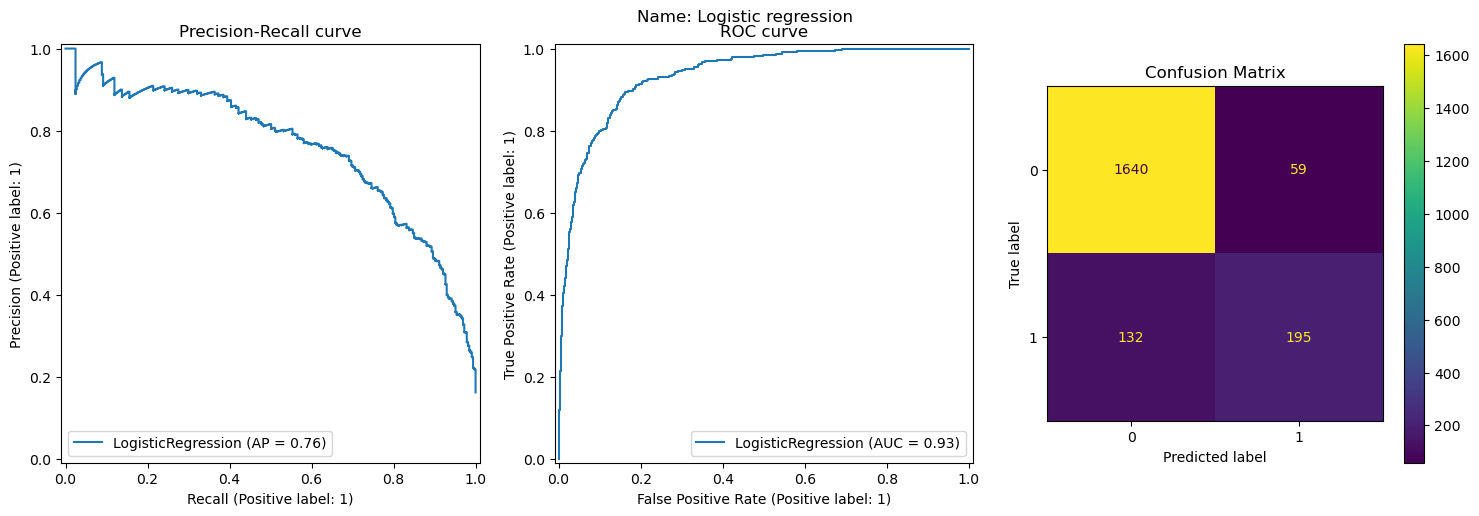

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.94      1699
           1       0.77      0.60      0.67       327

    accuracy                           0.91      2026
   macro avg       0.85      0.78      0.81      2026
weighted avg       0.90      0.91      0.90      2026

1. Training time taken by Logistic regression: 0.04 seconds
2. ROC-AUC Score: 0.93
3. Accuracy on training data: 0.91




Grid-search CV
Best parameters:
 {'C': 0.7, 'l1_ratio': 0.75, 'penalty': 'elasticnet', 'solver': 'saga'}
Best score (on train set): 0.9118625143753665
Classification report with best parameters:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      1699
           1       0.77      0.60      0.67       327

    accuracy                           0.91      2026
   macro avg       0.85      0.78      0.81      2026
weighted avg       0.90      0.91      0.90      2026



In [466]:
#logistic regression
logreg_clf = LogisticRegression(max_iter=1000)
param_grid={'solver':['saga'],'penalty':['elasticnet'],'l1_ratio':[0.25, 0.5, 0.55, 0.6, 0.70, 0.75],'C':[0.01, 0.1, 0.5, 0.7]}
       
# Evaluate
metrics = evaluate_clf(LogisticRegression(max_iter=1000),'Logistic regression',X_train,y_train,X_test,y_test,param_grid)
#model_metrics = model_metrics.append(metrics, ignore_index=True)

churn
0    6801
1    1300
Name: count, dtype: int64

After smote
churn
0    6801
1    6801
Name: count, dtype: int64

2.Roc-Auc Score(with smote) 0.8555086370287973
classification report:
               precision    recall  f1-score   support

           0       0.97      0.87      0.91      1699
           1       0.55      0.84      0.67       327

    accuracy                           0.86      2026
   macro avg       0.76      0.86      0.79      2026
weighted avg       0.90      0.86      0.87      2026

accuracy for training data: 0.8632773938795657


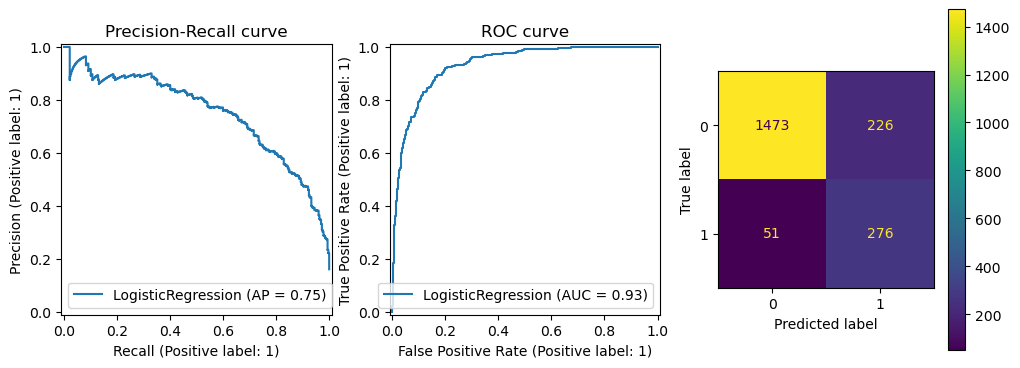

In [467]:
smote_predict( LogisticRegression(max_iter=1000),X_train,X_test,y_train,y_test)

Compute a dict of metrics for easy comparison of various models


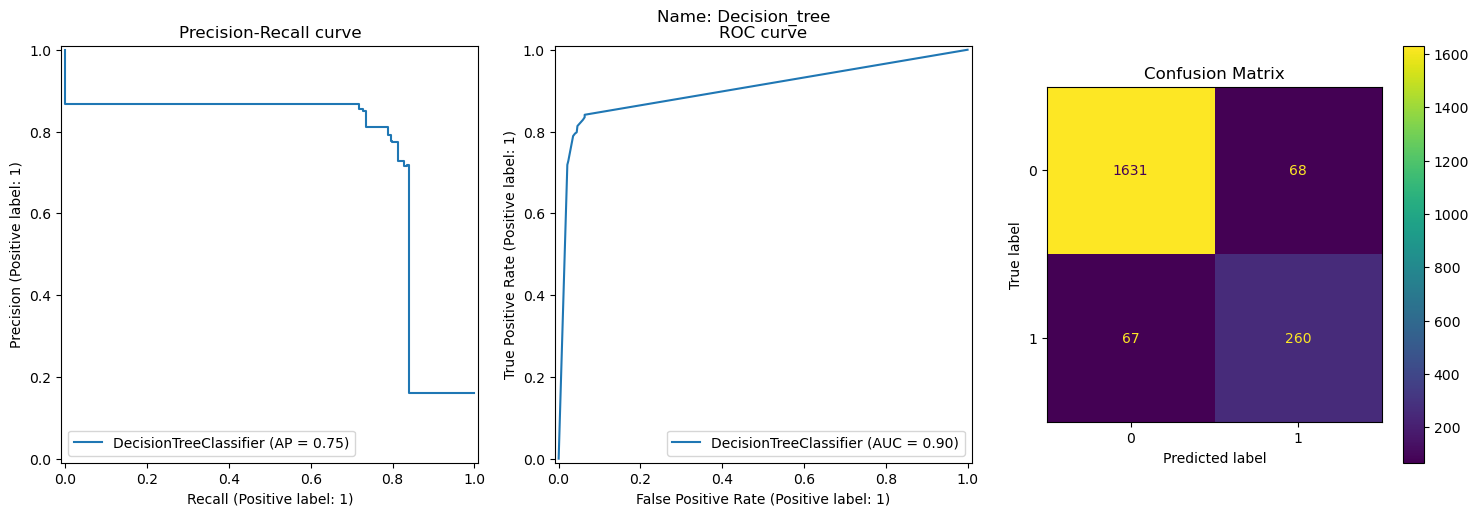

Classification report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1699
           1       0.79      0.80      0.79       327

    accuracy                           0.93      2026
   macro avg       0.88      0.88      0.88      2026
weighted avg       0.93      0.93      0.93      2026

1. Training time taken by Decision_tree: 0.05 seconds
2. ROC-AUC Score: 0.90
3. Accuracy on training data: 0.98




Grid-search CV
Best parameters:
 {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 9, 'min_samples_split': 2}
Best score (on train set): 0.943587558358276
Classification report with best parameters:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1699
           1       0.81      0.80      0.81       327

    accuracy                           0.94      2026
   macro avg       0.89      0.88      0.88      2026
weighted avg       0.94      0.94      0.94    

In [468]:
dt_clf= DecisionTreeClassifier()
param_grid={'criterion':['gini','entropy'],'max_depth':[None,2,4,5,8],
            'min_samples_split':[2,4,7,9],
             'min_samples_leaf':[4,5,8,9]}
metrics = evaluate_clf(DecisionTreeClassifier(max_depth=None,min_samples_split=2,min_samples_leaf=3),'Decision_tree',X_train,y_train,X_test,y_test,param_grid)

churn
0    6801
1    1300
Name: count, dtype: int64

After smote
churn
0    6801
1    6801
Name: count, dtype: int64

2.Roc-Auc Score(with smote) 0.8787126084240956
classification report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95      1699
           1       0.75      0.81      0.78       327

    accuracy                           0.92      2026
   macro avg       0.85      0.88      0.87      2026
weighted avg       0.93      0.92      0.93      2026

accuracy for training data: 0.9249753208292202


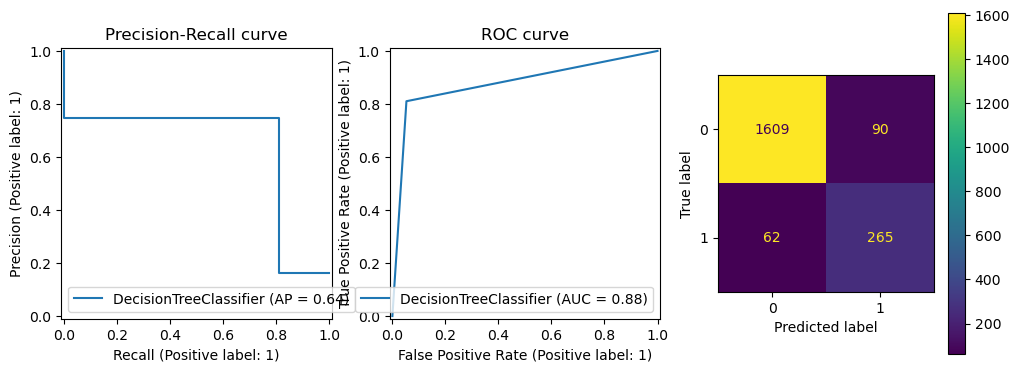

In [469]:
smote_predict(DecisionTreeClassifier(),X_train,X_test,y_train,y_test)

In [470]:
#voting ensemble
# Define individual models
from sklearn.ensemble import VotingClassifier
clf1= XGBClassifier(use_label_encoder=False, eval_metric='logloss')
clf2 = DecisionTreeClassifier(criterion='entropy', max_depth= None, min_samples_leaf= 9, min_samples_split= 2)
clf3 = RandomForestClassifier()

# Create a voting classifier
voting_clf = VotingClassifier(
    estimators=[('xg', clf1), ('dt', clf2), ('rf', clf3)],
    voting='soft'
)

# Train the voting classifier
voting_clf.fit(X_train, y_train)

# Make predictions
y_pred = voting_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Voting Classifier report:\n", classification_report(y_test,y_pred))

Voting Classifier report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      1699
           1       0.90      0.84      0.87       327

    accuracy                           0.96      2026
   macro avg       0.94      0.91      0.92      2026
weighted avg       0.96      0.96      0.96      2026



churn
0    6801
1    1300
Name: count, dtype: int64

After smote
churn
0    6801
1    6801
Name: count, dtype: int64

2.Roc-Auc Score(with smote) 0.9338862759709345
classification report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      1699
           1       0.86      0.90      0.88       327

    accuracy                           0.96      2026
   macro avg       0.92      0.93      0.93      2026
weighted avg       0.96      0.96      0.96      2026

accuracy for training data: 0.9595261599210266


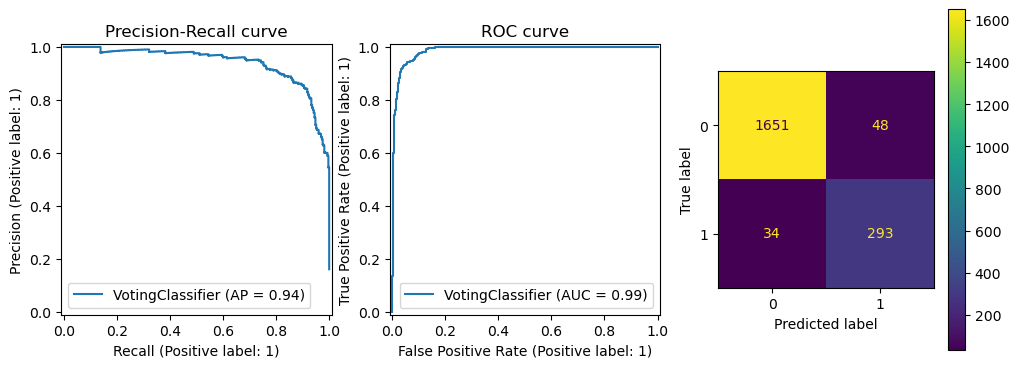

In [471]:
smote_predict(VotingClassifier(
    estimators=[('xg', clf1), ('dt', clf2), ('rf', clf3)],
    voting='soft'
),X_train,X_test,y_train,y_test)

#  Random Forest

In [478]:
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print('accuracy on training data',accuracy_score(y_test,y_test_pred))
print('classification_report',classification_report(y_test,y_test_pred))

accuracy on training data 0.9496544916090819
classification_report               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1699
           1       0.93      0.75      0.83       327

    accuracy                           0.95      2026
   macro avg       0.94      0.87      0.90      2026
weighted avg       0.95      0.95      0.95      2026



churn
0    6801
1    1300
Name: count, dtype: int64

After smote
churn
0    6801
1    6801
Name: count, dtype: int64

2.Roc-Auc Score(with smote) 0.9021919711721051
classification report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      1699
           1       0.90      0.82      0.86       327

    accuracy                           0.96      2026
   macro avg       0.93      0.90      0.92      2026
weighted avg       0.96      0.96      0.96      2026

accuracy for training data: 0.956071076011846


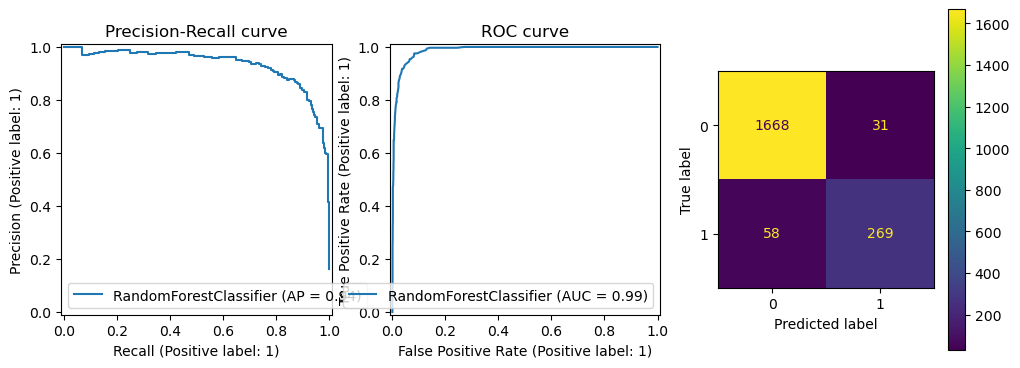

In [479]:
smote_predict(RandomForestClassifier(),X_train,X_test,y_train,y_test)


2.Roc-Auc Score(with smote) 0.9352236339778931
classification report:
               precision    recall  f1-score   support

           0       0.99      0.93      0.96      1699
           1       0.73      0.94      0.82       327

    accuracy                           0.93      2026
   macro avg       0.86      0.94      0.89      2026
weighted avg       0.95      0.93      0.94      2026

accuracy for training data: 0.9348469891411648


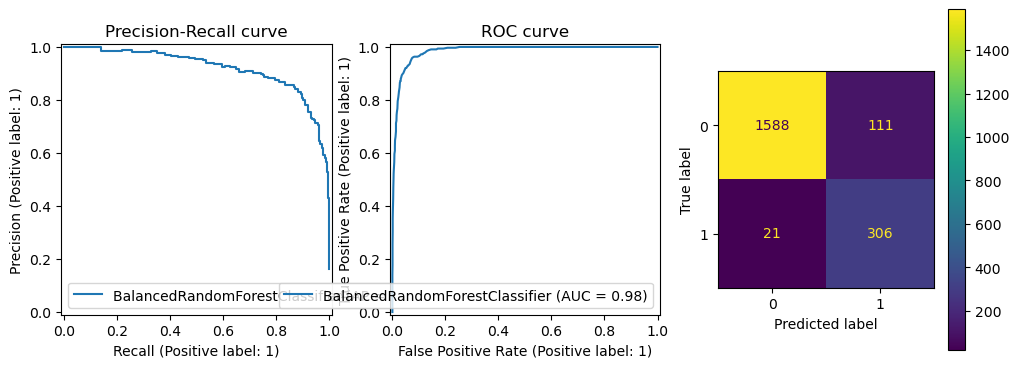

In [473]:
#balanced random forest
from imblearn.ensemble import BalancedRandomForestClassifier
# Applying SMOTE
classifier = BalancedRandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Predict test set
y_pred_brf = classifier.predict(X_test)
y_proba_brf = classifier.predict_proba(X_test)[:, 1]

fig,axs=plt.subplots(1,3)
fig.set_size_inches(10,4)
#fig.suptitle(f'Name:{clf_name}')
plt.tight_layout()
axs[0].set_title('Precision-Recall curve')
axs[1].set_title('ROC curve')
PrecisionRecallDisplay.from_estimator(classifier,X_test,y_test,ax=axs[0])
RocCurveDisplay.from_estimator(classifier, X_test, y_test, ax=axs[1]);
ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=axs[2]);
print('\n2.Roc-Auc Score(with smote)',roc_auc_score(y_test, y_pred_brf))
print('classification report:\n',classification_report(y_test,y_pred_brf))
print('accuracy for training data:',accuracy_score(y_test,y_pred_brf))

In [474]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train,y_train)
y_pred_test_=model.predict(X_test)
y_pred_train_=model.predict(X_train)
print('accuracy of training data',accuracy_score(y_train,y_pred_train_))
print('\nclassification_report:\n',classification_report(y_test,y_pred_test_))



accuracy of training data 0.9760523392173805

classification_report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1699
           1       0.94      0.84      0.89       327

    accuracy                           0.97      2026
   macro avg       0.95      0.92      0.93      2026
weighted avg       0.96      0.97      0.96      2026



churn
0    6801
1    1300
Name: count, dtype: int64

After smote
churn
0    6801
1    6801
Name: count, dtype: int64

2.Roc-Auc Score(with smote) 0.9381215429835502
classification report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      1699
           1       0.87      0.90      0.89       327

    accuracy                           0.96      2026
   macro avg       0.93      0.94      0.93      2026
weighted avg       0.96      0.96      0.96      2026

accuracy for training data: 0.9624876604146101


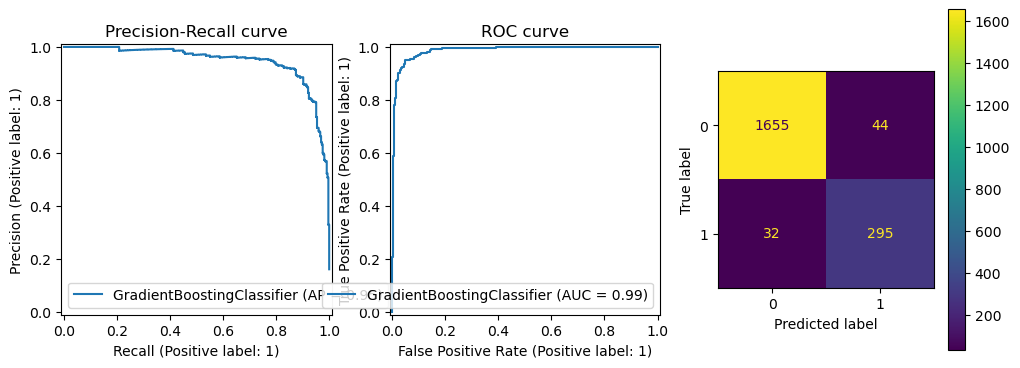

In [475]:
clf=GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
smote_predict(clf,X_train,X_test,y_train,y_test)

Compute a dict of metrics for easy comparison of various models


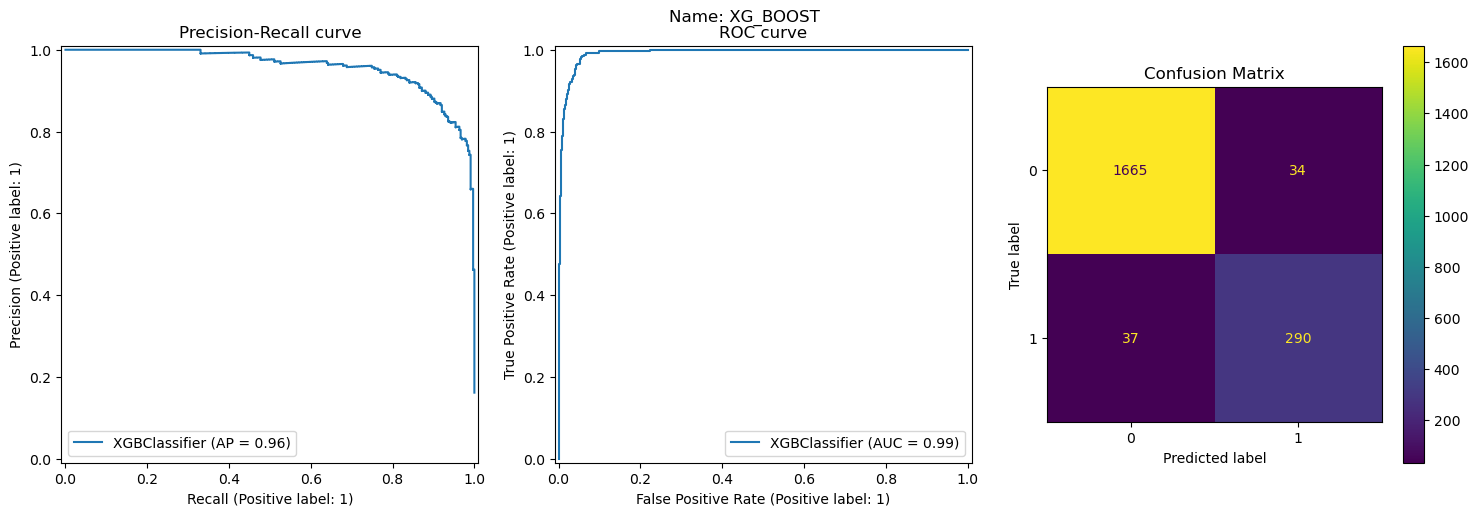

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1699
           1       0.90      0.89      0.89       327

    accuracy                           0.96      2026
   macro avg       0.94      0.93      0.94      2026
weighted avg       0.96      0.96      0.96      2026

1. Training time taken by XG_BOOST: 0.10 seconds
2. ROC-AUC Score: 0.99
3. Accuracy on training data: 1.00




Grid-search CV
Best parameters:
 {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
Best score (on train set): 0.9738307400552927
Classification report with best parameters:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1699
           1       0.90      0.88      0.89       327

    accuracy                           0.97      2026
   macro avg       0.94      0.93      0.94      2026
weighted avg       0.97      0.97      0.97      2026



In [476]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
param_grid={'n_estimators': [50, 100, 200],
        'max_depth': [3, 4, 5, 6],
        'learning_rate': [0.01, 0.1, 0.2]}
metrics = evaluate_clf(XGBClassifier(use_label_encoder=False
                                     , eval_metric='logloss'),'XG_BOOST',X_train,y_train,X_test,y_test,param_grid)



churn
0    6801
1    1300
Name: count, dtype: int64

After smote
churn
0    6801
1    6801
Name: count, dtype: int64

2.Roc-Auc Score(with smote) 0.9340653703473711
classification report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1699
           1       0.89      0.89      0.89       327

    accuracy                           0.96      2026
   macro avg       0.93      0.93      0.93      2026
weighted avg       0.96      0.96      0.96      2026

accuracy for training data: 0.9639684106614018


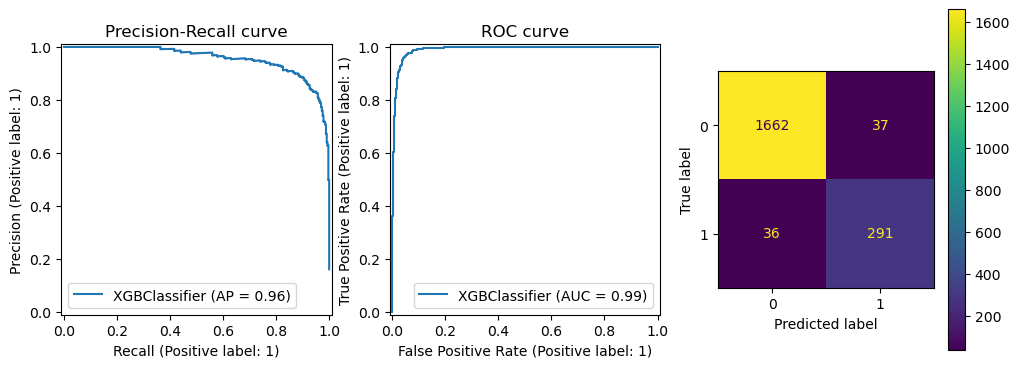

In [477]:
classifier=XGBClassifier(use_label_encoder=False, eval_metric='logloss')
smote_predict(classifier,X_train,X_test,y_train,y_test)

In [480]:
# Pickle dump the trained classifier
import pickle
with open('xgb_classifier.pkl', 'wb') as file:
    pickle.dump(classifier, file)